# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

#helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

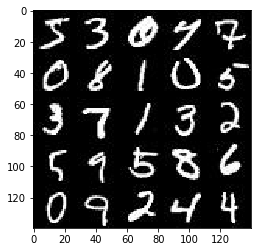

In [1]:
import helper
show_n_images = 25
data_dir = './data'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

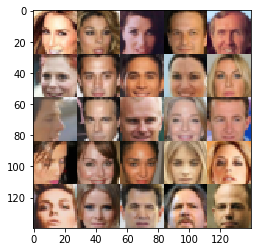

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [3]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


C:\Users\Shiv\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [14]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_real = tf.placeholder(tf.float32,[None, image_width, image_height, image_channels], name="input_real")
    input_z = tf.placeholder(tf.float32, [None, z_dim], name="input_z")
    learning_rate = tf.placeholder(tf.float32, shape=(), name="learning_rate")
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [16]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    
    with tf.variable_scope('discriminator', reuse=reuse):
        layer1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="SAME")
        layer1 = tf.maximum(alpha * layer1, layer1)
        
        layer2 = tf.layers.conv2d(layer1, 128, 5, strides=2, padding="SAME")
        layer2 = tf.layers.batch_normalization(layer2,training=True)
        layer2 = tf.maximum(alpha * layer2, layer2)
        
        layer3 = tf.layers.conv2d(layer2, 256, 5, strides=1, padding="SAME")
        layer3 = tf.layers.batch_normalization(layer3, training=True)
        layer3 = tf.maximum(alpha * layer3, layer3)
        
        layer4 = tf.layers.conv2d(layer3, 512, 5, strides=1, padding="SAME")
        layer4 = tf.layers.batch_normalization(layer4, training=True)
        layer4 = tf.maximum(alpha * layer4, layer4)
        
        flat_tensor = tf.reshape(layer4, (-1, 7*7*512))
        logits = tf.layers.dense(flat_tensor, 1)
        output = tf.sigmoid(logits)
    
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [17]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse= False if is_train==True else True):
        layer1 = tf.layers.dense(z, 7*7*512)
        layer1 = tf.reshape(layer1, (-1, 7, 7, 512))
        layer1 = tf.maximum(alpha * layer1, layer1)
        
        layer2 = tf.layers.conv2d_transpose(layer1, 256, 3, strides=1, padding="SAME")
        layer2 = tf.layers.batch_normalization(layer2, training=True)
        layer2 = tf.maximum(layer2 * alpha, layer2)
        
        layer3 = tf.layers.conv2d_transpose(layer2, 128, 3, strides=1, padding="SAME")
        layer3 = tf.layers.batch_normalization(layer3, training=True)
        layer3 = tf.maximum(layer3 * alpha, layer3)
        
        layer4 = tf.layers.conv2d_transpose(layer3, 64, 3, strides=2, padding="SAME")
        layer4 = tf.layers.batch_normalization(layer4, training=True)
        layer4 = tf.maximum(layer4 * alpha, layer4)
        
        logits = tf.layers.conv2d_transpose(layer4, out_channel_dim, 3, strides=2, padding="SAME")
        output = tf.tanh(logits)
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [19]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    
    generator_model = generator(input_z, out_channel_dim, is_train=True)
    disc_model_real, disc_logits_real = discriminator(input_real, reuse=False)
    disc_model_fake, disc_logits_fake = discriminator(generator_model, reuse=True)
    
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake, 
                                        labels=tf.ones_like(disc_model_fake)))
    
    disc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_real, 
                                        labels=tf.ones_like(disc_model_real)))
    
    disc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake, 
                                        labels=tf.zeros_like(disc_model_fake)))
    
    total_disc_loss = disc_loss_real + disc_loss_fake
    
    return (total_disc_loss, gen_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [20]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_var = tf.trainable_variables()
    d_var = [var for var in t_var if var.name.startswith('discriminator')]
    g_var = [var for var in t_var if var.name.startswith('generator')]
    
    d_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_var)
    g_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_var)
    
    return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [22]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, lr_rt = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim=z_dim)
    discriminator_loss, generator_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(discriminator_loss, generator_loss, lr_rt, beta1=beta1)
    count = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_opt, feed_dict={
                    input_real:batch_images, 
                    input_z:batch_z,
                    lr_rt : learning_rate
                })
                _ = sess.run(g_opt, feed_dict={
                    input_z:batch_z,
                    lr_rt : learning_rate
                })
                if count % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                count = count + 1
                if count % 10 == 0:
                    d_loss = discriminator_loss.eval({input_real: batch_images, input_z:batch_z, lr_rt:learning_rate})
                    g_loss = generator_loss.eval({input_z: batch_z, lr_rt : learning_rate})
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(d_loss),
                          "Generator Loss: {:.4f}".format(g_loss))
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.5165... Generator Loss: 2.9616
Epoch 1/2... Discriminator Loss: 5.0617... Generator Loss: 0.2142
Epoch 1/2... Discriminator Loss: 4.1498... Generator Loss: 10.1230
Epoch 1/2... Discriminator Loss: 8.7706... Generator Loss: 0.0248
Epoch 1/2... Discriminator Loss: 0.7601... Generator Loss: 3.5350
Epoch 1/2... Discriminator Loss: 2.7100... Generator Loss: 3.4471
Epoch 1/2... Discriminator Loss: 5.5685... Generator Loss: 0.2831
Epoch 1/2... Discriminator Loss: 9.1608... Generator Loss: 0.0026
Epoch 1/2... Discriminator Loss: 12.9493... Generator Loss: 0.0001
Epoch 1/2... Discriminator Loss: 4.2086... Generator Loss: 0.3317


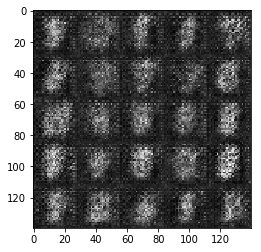

Epoch 1/2... Discriminator Loss: 2.2913... Generator Loss: 0.2581
Epoch 1/2... Discriminator Loss: 2.3543... Generator Loss: 0.9731
Epoch 1/2... Discriminator Loss: 2.3871... Generator Loss: 6.7075
Epoch 1/2... Discriminator Loss: 2.8318... Generator Loss: 6.6581
Epoch 1/2... Discriminator Loss: 4.0245... Generator Loss: 0.2794
Epoch 1/2... Discriminator Loss: 2.9382... Generator Loss: 0.0820
Epoch 1/2... Discriminator Loss: 0.8759... Generator Loss: 3.3995
Epoch 1/2... Discriminator Loss: 1.7669... Generator Loss: 0.4186
Epoch 1/2... Discriminator Loss: 2.0171... Generator Loss: 0.2934
Epoch 1/2... Discriminator Loss: 1.6003... Generator Loss: 0.5317


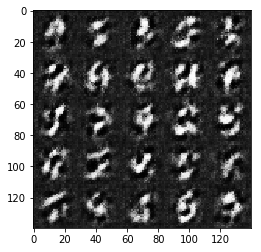

Epoch 1/2... Discriminator Loss: 2.0457... Generator Loss: 2.0586
Epoch 1/2... Discriminator Loss: 3.8086... Generator Loss: 4.0398
Epoch 1/2... Discriminator Loss: 1.6607... Generator Loss: 3.1308
Epoch 1/2... Discriminator Loss: 1.3975... Generator Loss: 0.7543
Epoch 1/2... Discriminator Loss: 0.6707... Generator Loss: 2.6054
Epoch 1/2... Discriminator Loss: 2.9536... Generator Loss: 0.2574
Epoch 1/2... Discriminator Loss: 1.1102... Generator Loss: 0.9518
Epoch 1/2... Discriminator Loss: 3.9140... Generator Loss: 0.0619
Epoch 1/2... Discriminator Loss: 0.8505... Generator Loss: 2.3517
Epoch 1/2... Discriminator Loss: 0.5582... Generator Loss: 1.6355


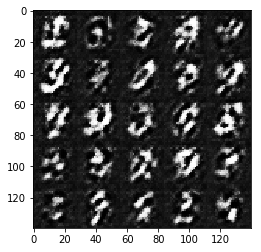

Epoch 1/2... Discriminator Loss: 0.5758... Generator Loss: 1.2561
Epoch 1/2... Discriminator Loss: 0.8323... Generator Loss: 0.9201
Epoch 1/2... Discriminator Loss: 0.9380... Generator Loss: 2.9067
Epoch 1/2... Discriminator Loss: 0.9452... Generator Loss: 1.0044
Epoch 1/2... Discriminator Loss: 3.6425... Generator Loss: 0.0346
Epoch 1/2... Discriminator Loss: 1.0977... Generator Loss: 0.9469
Epoch 1/2... Discriminator Loss: 0.3824... Generator Loss: 2.7931
Epoch 1/2... Discriminator Loss: 0.6302... Generator Loss: 4.9916
Epoch 1/2... Discriminator Loss: 0.1145... Generator Loss: 3.1773
Epoch 1/2... Discriminator Loss: 0.4199... Generator Loss: 2.0786


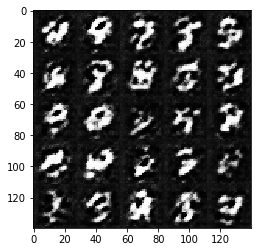

Epoch 1/2... Discriminator Loss: 0.1474... Generator Loss: 2.9313
Epoch 1/2... Discriminator Loss: 5.0909... Generator Loss: 0.0229
Epoch 1/2... Discriminator Loss: 0.3506... Generator Loss: 1.7693
Epoch 1/2... Discriminator Loss: 2.3834... Generator Loss: 3.6702
Epoch 1/2... Discriminator Loss: 0.0679... Generator Loss: 4.7036
Epoch 1/2... Discriminator Loss: 2.6043... Generator Loss: 5.8984
Epoch 1/2... Discriminator Loss: 0.3030... Generator Loss: 3.5172
Epoch 1/2... Discriminator Loss: 0.4747... Generator Loss: 6.5765
Epoch 1/2... Discriminator Loss: 0.6635... Generator Loss: 1.1149
Epoch 1/2... Discriminator Loss: 0.5097... Generator Loss: 1.5646


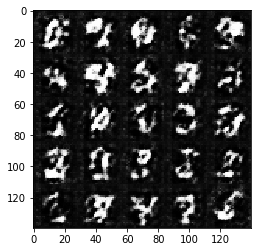

Epoch 1/2... Discriminator Loss: 0.0925... Generator Loss: 4.3390
Epoch 1/2... Discriminator Loss: 0.0380... Generator Loss: 4.2156
Epoch 1/2... Discriminator Loss: 0.4418... Generator Loss: 2.0956
Epoch 1/2... Discriminator Loss: 0.4656... Generator Loss: 2.2120
Epoch 1/2... Discriminator Loss: 0.2721... Generator Loss: 3.5745
Epoch 1/2... Discriminator Loss: 1.3054... Generator Loss: 0.7990
Epoch 1/2... Discriminator Loss: 0.3422... Generator Loss: 2.4427
Epoch 1/2... Discriminator Loss: 1.1569... Generator Loss: 0.4943
Epoch 1/2... Discriminator Loss: 0.8987... Generator Loss: 5.1574
Epoch 1/2... Discriminator Loss: 0.0862... Generator Loss: 3.5514


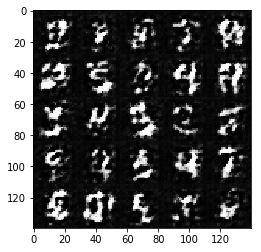

Epoch 1/2... Discriminator Loss: 1.7682... Generator Loss: 0.3828
Epoch 1/2... Discriminator Loss: 1.0768... Generator Loss: 0.6498
Epoch 1/2... Discriminator Loss: 0.0255... Generator Loss: 4.5398
Epoch 1/2... Discriminator Loss: 0.0887... Generator Loss: 3.4959
Epoch 1/2... Discriminator Loss: 0.3935... Generator Loss: 2.5873
Epoch 1/2... Discriminator Loss: 2.0663... Generator Loss: 0.5651
Epoch 1/2... Discriminator Loss: 0.2235... Generator Loss: 2.3434
Epoch 1/2... Discriminator Loss: 0.6187... Generator Loss: 2.7753
Epoch 1/2... Discriminator Loss: 1.7956... Generator Loss: 0.4642
Epoch 1/2... Discriminator Loss: 1.5091... Generator Loss: 0.4722


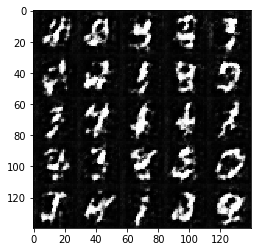

Epoch 1/2... Discriminator Loss: 0.8110... Generator Loss: 2.0795
Epoch 1/2... Discriminator Loss: 1.0653... Generator Loss: 0.5618
Epoch 1/2... Discriminator Loss: 2.4530... Generator Loss: 0.1525
Epoch 1/2... Discriminator Loss: 1.4354... Generator Loss: 0.3931
Epoch 1/2... Discriminator Loss: 0.6971... Generator Loss: 1.1748
Epoch 1/2... Discriminator Loss: 0.4617... Generator Loss: 2.2978
Epoch 1/2... Discriminator Loss: 0.5775... Generator Loss: 1.3904
Epoch 1/2... Discriminator Loss: 4.2646... Generator Loss: 0.0220
Epoch 1/2... Discriminator Loss: 1.4488... Generator Loss: 0.6303
Epoch 1/2... Discriminator Loss: 0.3022... Generator Loss: 2.4122


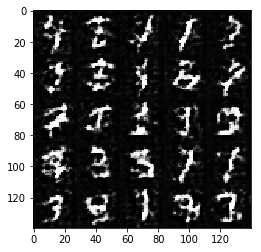

Epoch 1/2... Discriminator Loss: 0.5053... Generator Loss: 3.2458
Epoch 1/2... Discriminator Loss: 0.6262... Generator Loss: 2.6698
Epoch 1/2... Discriminator Loss: 0.7628... Generator Loss: 0.9437
Epoch 1/2... Discriminator Loss: 0.1919... Generator Loss: 3.7009
Epoch 1/2... Discriminator Loss: 0.3600... Generator Loss: 2.3997
Epoch 1/2... Discriminator Loss: 1.3364... Generator Loss: 0.4912
Epoch 1/2... Discriminator Loss: 0.5687... Generator Loss: 1.2114
Epoch 1/2... Discriminator Loss: 0.3714... Generator Loss: 1.9379
Epoch 1/2... Discriminator Loss: 0.5586... Generator Loss: 1.6927
Epoch 1/2... Discriminator Loss: 1.5062... Generator Loss: 0.4566


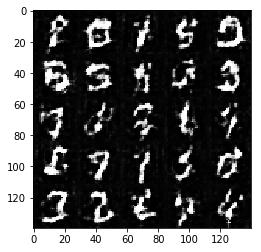

Epoch 1/2... Discriminator Loss: 0.4246... Generator Loss: 1.7544
Epoch 1/2... Discriminator Loss: 0.5675... Generator Loss: 1.3487
Epoch 1/2... Discriminator Loss: 0.4172... Generator Loss: 3.1184
Epoch 1/2... Discriminator Loss: 1.0195... Generator Loss: 0.9882
Epoch 1/2... Discriminator Loss: 1.7097... Generator Loss: 0.4396
Epoch 1/2... Discriminator Loss: 2.0438... Generator Loss: 0.4410
Epoch 1/2... Discriminator Loss: 0.4009... Generator Loss: 3.0113
Epoch 1/2... Discriminator Loss: 1.3719... Generator Loss: 0.7011
Epoch 1/2... Discriminator Loss: 1.0641... Generator Loss: 0.7446
Epoch 1/2... Discriminator Loss: 1.7106... Generator Loss: 0.5902


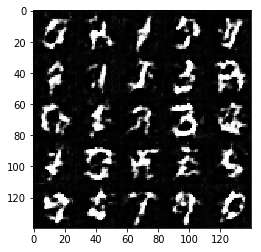

Epoch 1/2... Discriminator Loss: 0.4011... Generator Loss: 1.6180
Epoch 1/2... Discriminator Loss: 0.1919... Generator Loss: 2.4488
Epoch 1/2... Discriminator Loss: 2.4328... Generator Loss: 0.1854
Epoch 1/2... Discriminator Loss: 0.9433... Generator Loss: 1.2596
Epoch 1/2... Discriminator Loss: 1.4688... Generator Loss: 0.5426
Epoch 1/2... Discriminator Loss: 2.4721... Generator Loss: 0.1738
Epoch 1/2... Discriminator Loss: 0.9108... Generator Loss: 5.9127
Epoch 1/2... Discriminator Loss: 0.0990... Generator Loss: 4.1570
Epoch 1/2... Discriminator Loss: 1.0723... Generator Loss: 0.6188
Epoch 1/2... Discriminator Loss: 1.8792... Generator Loss: 0.7113


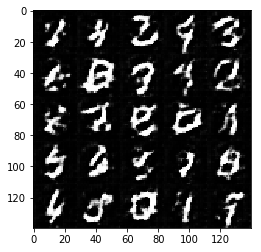

Epoch 1/2... Discriminator Loss: 0.4570... Generator Loss: 1.6431
Epoch 1/2... Discriminator Loss: 2.7826... Generator Loss: 0.1033
Epoch 1/2... Discriminator Loss: 0.9455... Generator Loss: 0.7939
Epoch 1/2... Discriminator Loss: 0.5333... Generator Loss: 1.8012
Epoch 1/2... Discriminator Loss: 1.2619... Generator Loss: 0.9188
Epoch 1/2... Discriminator Loss: 0.3209... Generator Loss: 2.7183
Epoch 1/2... Discriminator Loss: 1.9274... Generator Loss: 0.4794
Epoch 1/2... Discriminator Loss: 0.7846... Generator Loss: 1.4975
Epoch 1/2... Discriminator Loss: 0.7438... Generator Loss: 1.0828
Epoch 1/2... Discriminator Loss: 0.7450... Generator Loss: 1.9220


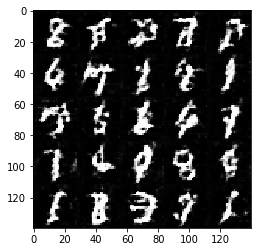

Epoch 1/2... Discriminator Loss: 1.0472... Generator Loss: 0.8518
Epoch 1/2... Discriminator Loss: 0.6859... Generator Loss: 1.2846
Epoch 1/2... Discriminator Loss: 0.3322... Generator Loss: 2.6631
Epoch 1/2... Discriminator Loss: 1.2952... Generator Loss: 0.8094
Epoch 1/2... Discriminator Loss: 0.2844... Generator Loss: 2.7103
Epoch 1/2... Discriminator Loss: 1.6336... Generator Loss: 0.6011
Epoch 1/2... Discriminator Loss: 3.1990... Generator Loss: 0.2153
Epoch 1/2... Discriminator Loss: 1.5084... Generator Loss: 0.4671
Epoch 1/2... Discriminator Loss: 2.3356... Generator Loss: 0.2360
Epoch 1/2... Discriminator Loss: 0.3735... Generator Loss: 4.0701


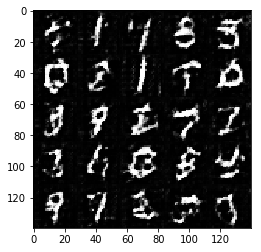

Epoch 1/2... Discriminator Loss: 2.7336... Generator Loss: 0.3027
Epoch 1/2... Discriminator Loss: 0.3802... Generator Loss: 1.9716
Epoch 1/2... Discriminator Loss: 3.1376... Generator Loss: 0.1203
Epoch 1/2... Discriminator Loss: 2.7271... Generator Loss: 0.1819
Epoch 1/2... Discriminator Loss: 0.5742... Generator Loss: 1.2889
Epoch 1/2... Discriminator Loss: 5.3953... Generator Loss: 0.0127
Epoch 1/2... Discriminator Loss: 3.3337... Generator Loss: 6.9892
Epoch 1/2... Discriminator Loss: 0.5459... Generator Loss: 1.2584
Epoch 1/2... Discriminator Loss: 0.7504... Generator Loss: 3.3954
Epoch 1/2... Discriminator Loss: 1.4257... Generator Loss: 0.4942


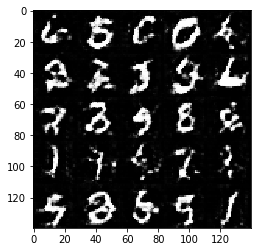

Epoch 1/2... Discriminator Loss: 0.7756... Generator Loss: 1.7220
Epoch 1/2... Discriminator Loss: 1.5258... Generator Loss: 0.7404
Epoch 1/2... Discriminator Loss: 1.8305... Generator Loss: 0.2771
Epoch 1/2... Discriminator Loss: 1.1659... Generator Loss: 0.9864
Epoch 1/2... Discriminator Loss: 0.4780... Generator Loss: 1.2479
Epoch 1/2... Discriminator Loss: 0.9012... Generator Loss: 1.0933
Epoch 1/2... Discriminator Loss: 2.5987... Generator Loss: 0.4141
Epoch 1/2... Discriminator Loss: 0.1606... Generator Loss: 3.1786
Epoch 1/2... Discriminator Loss: 0.4838... Generator Loss: 2.8138
Epoch 1/2... Discriminator Loss: 0.6079... Generator Loss: 1.2889


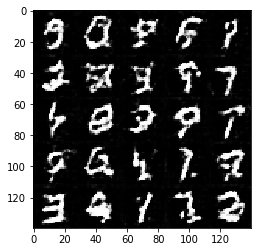

Epoch 1/2... Discriminator Loss: 1.4742... Generator Loss: 0.4451
Epoch 1/2... Discriminator Loss: 1.9151... Generator Loss: 0.2666
Epoch 1/2... Discriminator Loss: 0.5233... Generator Loss: 1.5133
Epoch 1/2... Discriminator Loss: 1.6056... Generator Loss: 0.3672
Epoch 1/2... Discriminator Loss: 1.4592... Generator Loss: 0.6672
Epoch 1/2... Discriminator Loss: 1.4502... Generator Loss: 0.6800
Epoch 1/2... Discriminator Loss: 4.9335... Generator Loss: 0.0186
Epoch 1/2... Discriminator Loss: 0.6174... Generator Loss: 2.7613
Epoch 1/2... Discriminator Loss: 1.4152... Generator Loss: 3.5059
Epoch 1/2... Discriminator Loss: 0.7438... Generator Loss: 3.4026


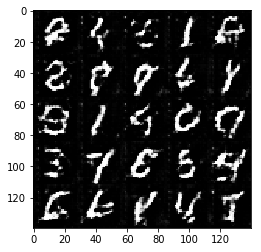

Epoch 1/2... Discriminator Loss: 4.1235... Generator Loss: 0.1987
Epoch 1/2... Discriminator Loss: 0.6187... Generator Loss: 1.1241
Epoch 1/2... Discriminator Loss: 0.1088... Generator Loss: 3.7224
Epoch 1/2... Discriminator Loss: 1.6543... Generator Loss: 2.2160
Epoch 1/2... Discriminator Loss: 1.0968... Generator Loss: 4.5177
Epoch 1/2... Discriminator Loss: 2.7123... Generator Loss: 0.2869
Epoch 1/2... Discriminator Loss: 3.3141... Generator Loss: 0.1329
Epoch 1/2... Discriminator Loss: 1.7476... Generator Loss: 0.7642
Epoch 1/2... Discriminator Loss: 1.5866... Generator Loss: 0.3458
Epoch 1/2... Discriminator Loss: 1.3412... Generator Loss: 0.7793


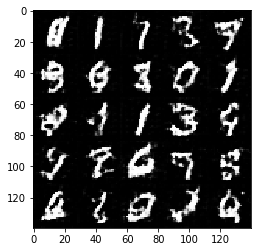

Epoch 1/2... Discriminator Loss: 0.8489... Generator Loss: 0.8963
Epoch 1/2... Discriminator Loss: 0.4240... Generator Loss: 2.0464
Epoch 1/2... Discriminator Loss: 0.9568... Generator Loss: 0.9004
Epoch 1/2... Discriminator Loss: 1.8907... Generator Loss: 0.2339
Epoch 1/2... Discriminator Loss: 0.3554... Generator Loss: 5.4420
Epoch 1/2... Discriminator Loss: 1.4769... Generator Loss: 0.8612
Epoch 1/2... Discriminator Loss: 0.6882... Generator Loss: 1.4350
Epoch 1/2... Discriminator Loss: 0.2146... Generator Loss: 2.9847
Epoch 1/2... Discriminator Loss: 1.9500... Generator Loss: 0.7218
Epoch 1/2... Discriminator Loss: 0.4366... Generator Loss: 1.6527


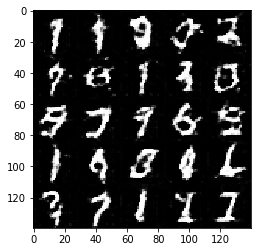

Epoch 1/2... Discriminator Loss: 1.2878... Generator Loss: 1.0234
Epoch 1/2... Discriminator Loss: 1.2853... Generator Loss: 0.9645
Epoch 1/2... Discriminator Loss: 3.2544... Generator Loss: 0.0993
Epoch 1/2... Discriminator Loss: 0.7350... Generator Loss: 0.7946
Epoch 1/2... Discriminator Loss: 0.5886... Generator Loss: 5.1951
Epoch 1/2... Discriminator Loss: 1.7098... Generator Loss: 0.4630
Epoch 1/2... Discriminator Loss: 0.8727... Generator Loss: 0.9129
Epoch 1/2... Discriminator Loss: 0.4852... Generator Loss: 1.4280
Epoch 1/2... Discriminator Loss: 0.1183... Generator Loss: 2.9739
Epoch 1/2... Discriminator Loss: 0.1455... Generator Loss: 2.7867


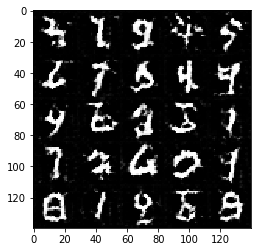

Epoch 1/2... Discriminator Loss: 0.5853... Generator Loss: 1.2318
Epoch 1/2... Discriminator Loss: 0.4126... Generator Loss: 1.4015
Epoch 1/2... Discriminator Loss: 1.9363... Generator Loss: 0.3209
Epoch 1/2... Discriminator Loss: 1.8606... Generator Loss: 0.4063
Epoch 1/2... Discriminator Loss: 3.5985... Generator Loss: 0.0783
Epoch 1/2... Discriminator Loss: 1.3744... Generator Loss: 0.3974
Epoch 1/2... Discriminator Loss: 2.1409... Generator Loss: 0.2586
Epoch 1/2... Discriminator Loss: 2.5345... Generator Loss: 0.1507
Epoch 1/2... Discriminator Loss: 4.5784... Generator Loss: 0.0175
Epoch 1/2... Discriminator Loss: 0.6627... Generator Loss: 2.1981


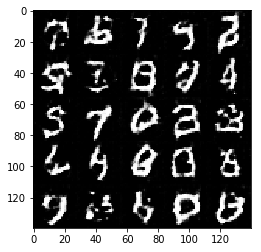

Epoch 1/2... Discriminator Loss: 2.6137... Generator Loss: 0.2042
Epoch 1/2... Discriminator Loss: 1.1591... Generator Loss: 0.5079
Epoch 1/2... Discriminator Loss: 3.6264... Generator Loss: 0.2516
Epoch 1/2... Discriminator Loss: 0.9602... Generator Loss: 0.6518
Epoch 1/2... Discriminator Loss: 0.6661... Generator Loss: 1.5105
Epoch 1/2... Discriminator Loss: 1.1303... Generator Loss: 2.9575
Epoch 1/2... Discriminator Loss: 0.7327... Generator Loss: 2.2729
Epoch 1/2... Discriminator Loss: 1.2012... Generator Loss: 0.5369
Epoch 1/2... Discriminator Loss: 1.3306... Generator Loss: 0.7164
Epoch 1/2... Discriminator Loss: 1.4593... Generator Loss: 0.6007


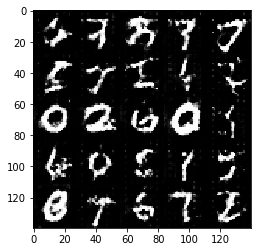

Epoch 1/2... Discriminator Loss: 4.7701... Generator Loss: 0.0273
Epoch 1/2... Discriminator Loss: 3.7684... Generator Loss: 0.0329
Epoch 1/2... Discriminator Loss: 1.0965... Generator Loss: 0.6038
Epoch 1/2... Discriminator Loss: 3.4174... Generator Loss: 0.2940
Epoch 1/2... Discriminator Loss: 1.8087... Generator Loss: 0.6349
Epoch 1/2... Discriminator Loss: 4.0429... Generator Loss: 0.0552
Epoch 1/2... Discriminator Loss: 2.0266... Generator Loss: 0.2284
Epoch 1/2... Discriminator Loss: 1.6215... Generator Loss: 0.4133
Epoch 1/2... Discriminator Loss: 0.2011... Generator Loss: 2.7893
Epoch 1/2... Discriminator Loss: 1.0973... Generator Loss: 1.2867


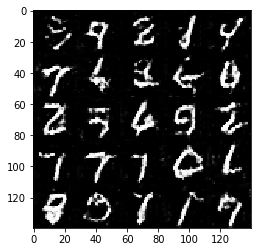

Epoch 1/2... Discriminator Loss: 0.4411... Generator Loss: 1.7962
Epoch 1/2... Discriminator Loss: 3.2927... Generator Loss: 0.1370
Epoch 1/2... Discriminator Loss: 1.7846... Generator Loss: 0.4082
Epoch 1/2... Discriminator Loss: 1.1414... Generator Loss: 1.4566
Epoch 1/2... Discriminator Loss: 1.0211... Generator Loss: 1.0816
Epoch 1/2... Discriminator Loss: 0.9972... Generator Loss: 1.1939
Epoch 1/2... Discriminator Loss: 1.6302... Generator Loss: 1.1856
Epoch 1/2... Discriminator Loss: 1.1491... Generator Loss: 0.8420
Epoch 1/2... Discriminator Loss: 3.0082... Generator Loss: 0.1456
Epoch 1/2... Discriminator Loss: 1.5676... Generator Loss: 0.7688


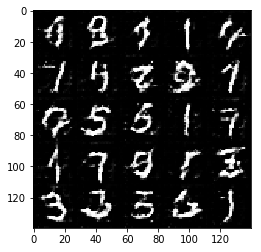

Epoch 1/2... Discriminator Loss: 1.2839... Generator Loss: 1.2572
Epoch 1/2... Discriminator Loss: 1.3244... Generator Loss: 1.1861
Epoch 1/2... Discriminator Loss: 0.4603... Generator Loss: 1.4379
Epoch 1/2... Discriminator Loss: 0.7986... Generator Loss: 1.0146
Epoch 1/2... Discriminator Loss: 0.9584... Generator Loss: 0.9732
Epoch 1/2... Discriminator Loss: 3.4989... Generator Loss: 0.1563
Epoch 1/2... Discriminator Loss: 0.0964... Generator Loss: 3.2004
Epoch 1/2... Discriminator Loss: 3.7528... Generator Loss: 0.0639
Epoch 1/2... Discriminator Loss: 0.7412... Generator Loss: 0.9552
Epoch 1/2... Discriminator Loss: 1.1110... Generator Loss: 1.3709


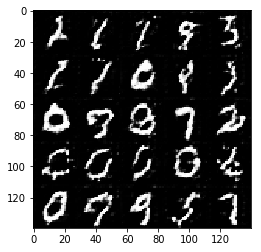

Epoch 1/2... Discriminator Loss: 2.4259... Generator Loss: 0.2008
Epoch 1/2... Discriminator Loss: 1.5237... Generator Loss: 1.0583
Epoch 1/2... Discriminator Loss: 1.3110... Generator Loss: 0.6435
Epoch 1/2... Discriminator Loss: 0.7243... Generator Loss: 6.6467
Epoch 1/2... Discriminator Loss: 1.5132... Generator Loss: 0.8986
Epoch 1/2... Discriminator Loss: 0.4074... Generator Loss: 2.2839
Epoch 1/2... Discriminator Loss: 0.4133... Generator Loss: 2.1470
Epoch 1/2... Discriminator Loss: 2.4825... Generator Loss: 0.3577
Epoch 1/2... Discriminator Loss: 1.2835... Generator Loss: 3.3054
Epoch 1/2... Discriminator Loss: 2.7720... Generator Loss: 7.8846


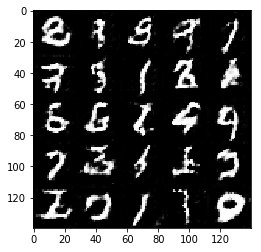

Epoch 1/2... Discriminator Loss: 0.6957... Generator Loss: 1.3363
Epoch 1/2... Discriminator Loss: 2.3782... Generator Loss: 0.3433
Epoch 1/2... Discriminator Loss: 1.1613... Generator Loss: 4.6276
Epoch 1/2... Discriminator Loss: 2.2739... Generator Loss: 0.3378
Epoch 1/2... Discriminator Loss: 2.0888... Generator Loss: 0.4589
Epoch 1/2... Discriminator Loss: 0.5399... Generator Loss: 1.3221
Epoch 1/2... Discriminator Loss: 2.8140... Generator Loss: 0.0822
Epoch 1/2... Discriminator Loss: 1.3651... Generator Loss: 0.4650
Epoch 1/2... Discriminator Loss: 1.4411... Generator Loss: 0.4472
Epoch 1/2... Discriminator Loss: 0.6986... Generator Loss: 1.4576


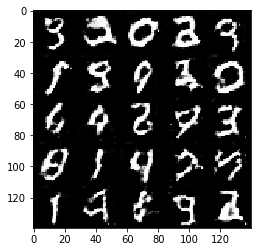

Epoch 1/2... Discriminator Loss: 0.4198... Generator Loss: 1.8987
Epoch 1/2... Discriminator Loss: 1.5123... Generator Loss: 0.3844
Epoch 1/2... Discriminator Loss: 1.9149... Generator Loss: 0.3836
Epoch 1/2... Discriminator Loss: 1.6948... Generator Loss: 0.4803
Epoch 1/2... Discriminator Loss: 1.1466... Generator Loss: 0.5907
Epoch 1/2... Discriminator Loss: 0.6451... Generator Loss: 5.1353
Epoch 1/2... Discriminator Loss: 2.5386... Generator Loss: 0.3509
Epoch 1/2... Discriminator Loss: 3.0402... Generator Loss: 0.2286
Epoch 1/2... Discriminator Loss: 1.8345... Generator Loss: 0.5994
Epoch 1/2... Discriminator Loss: 0.1902... Generator Loss: 3.9199


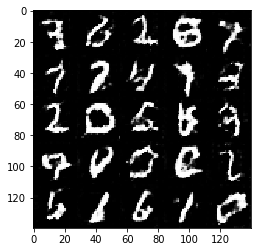

Epoch 1/2... Discriminator Loss: 0.3726... Generator Loss: 5.8056
Epoch 1/2... Discriminator Loss: 1.3597... Generator Loss: 0.8632
Epoch 1/2... Discriminator Loss: 1.9366... Generator Loss: 0.6514
Epoch 1/2... Discriminator Loss: 0.4325... Generator Loss: 2.4948
Epoch 1/2... Discriminator Loss: 4.3690... Generator Loss: 0.0651
Epoch 1/2... Discriminator Loss: 3.0814... Generator Loss: 0.1112
Epoch 1/2... Discriminator Loss: 0.5402... Generator Loss: 1.9262
Epoch 1/2... Discriminator Loss: 0.6910... Generator Loss: 1.5973
Epoch 1/2... Discriminator Loss: 2.9864... Generator Loss: 0.1042
Epoch 1/2... Discriminator Loss: 1.0272... Generator Loss: 0.7352


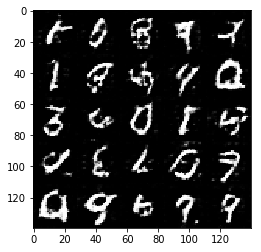

Epoch 1/2... Discriminator Loss: 0.6684... Generator Loss: 1.6564
Epoch 1/2... Discriminator Loss: 0.3158... Generator Loss: 3.6924
Epoch 1/2... Discriminator Loss: 0.7973... Generator Loss: 1.4784
Epoch 1/2... Discriminator Loss: 0.2770... Generator Loss: 1.8043
Epoch 1/2... Discriminator Loss: 1.4043... Generator Loss: 0.5624
Epoch 1/2... Discriminator Loss: 1.9889... Generator Loss: 0.7283
Epoch 1/2... Discriminator Loss: 2.0385... Generator Loss: 0.3588
Epoch 1/2... Discriminator Loss: 1.9489... Generator Loss: 0.5731
Epoch 1/2... Discriminator Loss: 3.2411... Generator Loss: 0.2115
Epoch 1/2... Discriminator Loss: 1.6084... Generator Loss: 0.4804


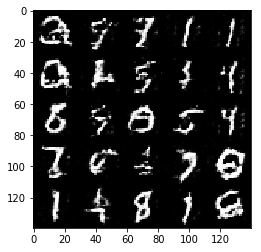

Epoch 1/2... Discriminator Loss: 0.0768... Generator Loss: 3.8691
Epoch 1/2... Discriminator Loss: 1.2436... Generator Loss: 0.5548
Epoch 1/2... Discriminator Loss: 1.1468... Generator Loss: 0.7662
Epoch 1/2... Discriminator Loss: 2.4645... Generator Loss: 0.4357
Epoch 1/2... Discriminator Loss: 0.7301... Generator Loss: 2.4004
Epoch 1/2... Discriminator Loss: 4.7154... Generator Loss: 0.0439
Epoch 1/2... Discriminator Loss: 2.0754... Generator Loss: 0.3769
Epoch 1/2... Discriminator Loss: 3.5095... Generator Loss: 0.0537
Epoch 1/2... Discriminator Loss: 0.9612... Generator Loss: 0.9933
Epoch 1/2... Discriminator Loss: 0.8383... Generator Loss: 1.0141


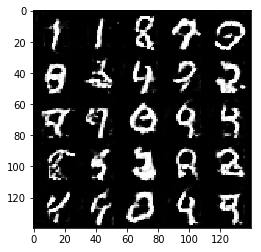

Epoch 1/2... Discriminator Loss: 3.7349... Generator Loss: 0.0967
Epoch 1/2... Discriminator Loss: 1.3828... Generator Loss: 0.7985
Epoch 1/2... Discriminator Loss: 1.4382... Generator Loss: 0.6038
Epoch 1/2... Discriminator Loss: 0.8235... Generator Loss: 0.6758
Epoch 1/2... Discriminator Loss: 3.8441... Generator Loss: 0.2551
Epoch 1/2... Discriminator Loss: 1.1124... Generator Loss: 2.7013
Epoch 1/2... Discriminator Loss: 1.4911... Generator Loss: 0.7686
Epoch 1/2... Discriminator Loss: 2.7768... Generator Loss: 0.1540
Epoch 1/2... Discriminator Loss: 1.1132... Generator Loss: 1.1762
Epoch 1/2... Discriminator Loss: 2.8412... Generator Loss: 0.2094


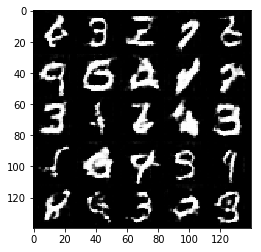

Epoch 1/2... Discriminator Loss: 1.0256... Generator Loss: 1.0098
Epoch 1/2... Discriminator Loss: 0.6207... Generator Loss: 1.4300
Epoch 1/2... Discriminator Loss: 0.7462... Generator Loss: 0.8810
Epoch 1/2... Discriminator Loss: 3.8354... Generator Loss: 0.0374
Epoch 1/2... Discriminator Loss: 0.7020... Generator Loss: 1.1918
Epoch 1/2... Discriminator Loss: 2.0189... Generator Loss: 0.4336
Epoch 1/2... Discriminator Loss: 0.2407... Generator Loss: 2.7358
Epoch 1/2... Discriminator Loss: 1.1614... Generator Loss: 0.7551
Epoch 1/2... Discriminator Loss: 0.6310... Generator Loss: 1.7796
Epoch 1/2... Discriminator Loss: 2.6031... Generator Loss: 0.1228


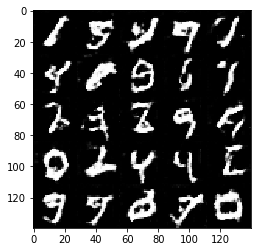

Epoch 1/2... Discriminator Loss: 0.8297... Generator Loss: 0.9942
Epoch 1/2... Discriminator Loss: 1.5118... Generator Loss: 0.7206
Epoch 1/2... Discriminator Loss: 1.4835... Generator Loss: 0.3784
Epoch 1/2... Discriminator Loss: 1.0724... Generator Loss: 0.5367
Epoch 1/2... Discriminator Loss: 0.5363... Generator Loss: 1.2734
Epoch 1/2... Discriminator Loss: 1.0955... Generator Loss: 1.2179
Epoch 1/2... Discriminator Loss: 2.1674... Generator Loss: 0.4950
Epoch 1/2... Discriminator Loss: 0.4277... Generator Loss: 1.6322
Epoch 1/2... Discriminator Loss: 0.2081... Generator Loss: 2.9661
Epoch 1/2... Discriminator Loss: 4.5995... Generator Loss: 0.0293


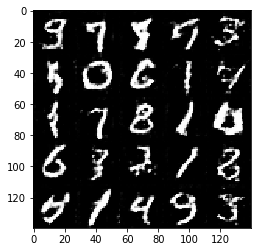

Epoch 1/2... Discriminator Loss: 3.0450... Generator Loss: 0.0936
Epoch 1/2... Discriminator Loss: 1.9163... Generator Loss: 0.5793
Epoch 1/2... Discriminator Loss: 0.3189... Generator Loss: 3.7154
Epoch 1/2... Discriminator Loss: 2.2093... Generator Loss: 0.2133
Epoch 1/2... Discriminator Loss: 1.8901... Generator Loss: 0.8232
Epoch 1/2... Discriminator Loss: 0.2462... Generator Loss: 2.7220
Epoch 1/2... Discriminator Loss: 1.1629... Generator Loss: 6.1717
Epoch 1/2... Discriminator Loss: 2.6300... Generator Loss: 0.1176
Epoch 1/2... Discriminator Loss: 3.4259... Generator Loss: 0.0968
Epoch 1/2... Discriminator Loss: 1.1457... Generator Loss: 1.2161


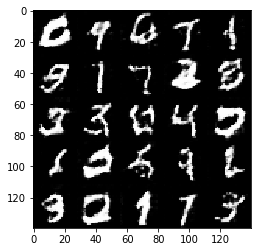

Epoch 1/2... Discriminator Loss: 0.1846... Generator Loss: 2.9932
Epoch 1/2... Discriminator Loss: 1.8004... Generator Loss: 0.4594
Epoch 1/2... Discriminator Loss: 0.3498... Generator Loss: 1.9590
Epoch 1/2... Discriminator Loss: 0.8030... Generator Loss: 1.3983
Epoch 1/2... Discriminator Loss: 0.9452... Generator Loss: 1.0705
Epoch 1/2... Discriminator Loss: 4.4207... Generator Loss: 0.1952
Epoch 1/2... Discriminator Loss: 2.1845... Generator Loss: 0.4355
Epoch 1/2... Discriminator Loss: 2.2980... Generator Loss: 0.9879
Epoch 1/2... Discriminator Loss: 0.5924... Generator Loss: 1.9228
Epoch 1/2... Discriminator Loss: 0.0478... Generator Loss: 5.4030


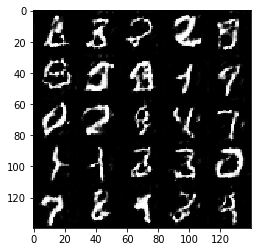

Epoch 1/2... Discriminator Loss: 0.7221... Generator Loss: 1.0557
Epoch 1/2... Discriminator Loss: 0.3876... Generator Loss: 3.1506
Epoch 1/2... Discriminator Loss: 0.6034... Generator Loss: 1.5864
Epoch 1/2... Discriminator Loss: 1.6137... Generator Loss: 3.0747
Epoch 1/2... Discriminator Loss: 4.3035... Generator Loss: 0.0225
Epoch 1/2... Discriminator Loss: 0.6342... Generator Loss: 2.6991
Epoch 1/2... Discriminator Loss: 1.4487... Generator Loss: 0.8972
Epoch 1/2... Discriminator Loss: 0.9126... Generator Loss: 1.7123
Epoch 1/2... Discriminator Loss: 0.9391... Generator Loss: 1.1585
Epoch 1/2... Discriminator Loss: 0.6219... Generator Loss: 1.2408


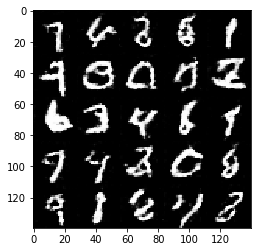

Epoch 1/2... Discriminator Loss: 0.4805... Generator Loss: 1.8461
Epoch 1/2... Discriminator Loss: 0.9042... Generator Loss: 1.0867
Epoch 1/2... Discriminator Loss: 1.8743... Generator Loss: 0.4373
Epoch 1/2... Discriminator Loss: 2.4503... Generator Loss: 0.1663
Epoch 1/2... Discriminator Loss: 0.6476... Generator Loss: 1.0555
Epoch 1/2... Discriminator Loss: 4.0572... Generator Loss: 0.0956
Epoch 1/2... Discriminator Loss: 1.4741... Generator Loss: 1.2056
Epoch 1/2... Discriminator Loss: 0.4261... Generator Loss: 1.8724
Epoch 1/2... Discriminator Loss: 0.1743... Generator Loss: 3.0743
Epoch 1/2... Discriminator Loss: 2.3063... Generator Loss: 0.3943


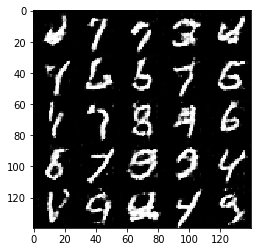

Epoch 1/2... Discriminator Loss: 2.2147... Generator Loss: 0.2834
Epoch 1/2... Discriminator Loss: 1.5026... Generator Loss: 0.4896
Epoch 1/2... Discriminator Loss: 1.4161... Generator Loss: 0.4782
Epoch 1/2... Discriminator Loss: 2.3038... Generator Loss: 0.3074
Epoch 1/2... Discriminator Loss: 5.1646... Generator Loss: 0.0090
Epoch 1/2... Discriminator Loss: 0.2106... Generator Loss: 4.9314
Epoch 1/2... Discriminator Loss: 1.4401... Generator Loss: 0.8290
Epoch 1/2... Discriminator Loss: 0.8756... Generator Loss: 1.0702
Epoch 1/2... Discriminator Loss: 2.0426... Generator Loss: 0.6085
Epoch 1/2... Discriminator Loss: 1.2519... Generator Loss: 0.8614


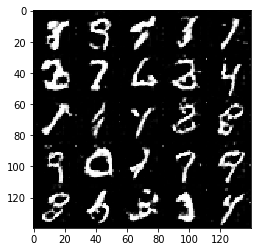

Epoch 1/2... Discriminator Loss: 0.4475... Generator Loss: 1.3622
Epoch 1/2... Discriminator Loss: 3.4198... Generator Loss: 0.1411
Epoch 1/2... Discriminator Loss: 1.0736... Generator Loss: 0.8486
Epoch 1/2... Discriminator Loss: 1.1427... Generator Loss: 1.7354
Epoch 1/2... Discriminator Loss: 0.4881... Generator Loss: 1.7255
Epoch 1/2... Discriminator Loss: 0.7812... Generator Loss: 0.9155
Epoch 1/2... Discriminator Loss: 1.6029... Generator Loss: 0.5805
Epoch 1/2... Discriminator Loss: 2.8633... Generator Loss: 0.4030
Epoch 1/2... Discriminator Loss: 0.2678... Generator Loss: 3.1056
Epoch 1/2... Discriminator Loss: 1.4524... Generator Loss: 0.7765


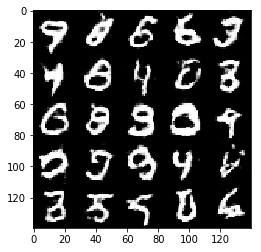

Epoch 1/2... Discriminator Loss: 2.1396... Generator Loss: 0.2105
Epoch 1/2... Discriminator Loss: 0.0586... Generator Loss: 3.5970
Epoch 1/2... Discriminator Loss: 0.1963... Generator Loss: 2.2300
Epoch 1/2... Discriminator Loss: 1.9190... Generator Loss: 0.3271
Epoch 1/2... Discriminator Loss: 0.5238... Generator Loss: 2.3538
Epoch 1/2... Discriminator Loss: 2.3234... Generator Loss: 0.2821
Epoch 1/2... Discriminator Loss: 2.6263... Generator Loss: 0.5180
Epoch 1/2... Discriminator Loss: 3.8763... Generator Loss: 0.0411
Epoch 1/2... Discriminator Loss: 0.3203... Generator Loss: 3.2083
Epoch 1/2... Discriminator Loss: 0.6208... Generator Loss: 3.0994


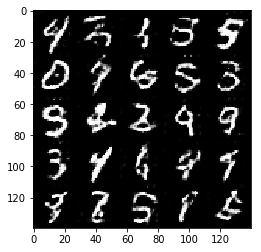

Epoch 1/2... Discriminator Loss: 2.2535... Generator Loss: 0.1821
Epoch 1/2... Discriminator Loss: 0.3886... Generator Loss: 2.0119
Epoch 1/2... Discriminator Loss: 0.6690... Generator Loss: 2.1504
Epoch 1/2... Discriminator Loss: 0.8455... Generator Loss: 1.0375
Epoch 1/2... Discriminator Loss: 1.2785... Generator Loss: 1.3048
Epoch 1/2... Discriminator Loss: 0.7852... Generator Loss: 1.1714
Epoch 1/2... Discriminator Loss: 1.0496... Generator Loss: 1.5768
Epoch 1/2... Discriminator Loss: 1.8651... Generator Loss: 0.6727
Epoch 1/2... Discriminator Loss: 1.1507... Generator Loss: 2.1220
Epoch 1/2... Discriminator Loss: 2.3906... Generator Loss: 0.1342


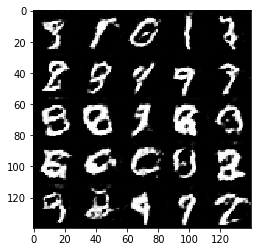

Epoch 1/2... Discriminator Loss: 3.1499... Generator Loss: 0.1012
Epoch 1/2... Discriminator Loss: 2.1880... Generator Loss: 0.4318
Epoch 1/2... Discriminator Loss: 1.0083... Generator Loss: 1.4160
Epoch 1/2... Discriminator Loss: 2.9875... Generator Loss: 0.2251
Epoch 1/2... Discriminator Loss: 1.2832... Generator Loss: 0.7561
Epoch 1/2... Discriminator Loss: 0.7430... Generator Loss: 1.0725
Epoch 1/2... Discriminator Loss: 2.4797... Generator Loss: 0.2165
Epoch 1/2... Discriminator Loss: 0.5709... Generator Loss: 1.7847
Epoch 1/2... Discriminator Loss: 0.3955... Generator Loss: 2.7021
Epoch 1/2... Discriminator Loss: 2.1327... Generator Loss: 0.2633


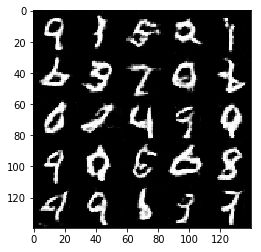

Epoch 1/2... Discriminator Loss: 1.2639... Generator Loss: 3.3049
Epoch 1/2... Discriminator Loss: 2.1589... Generator Loss: 0.3958
Epoch 1/2... Discriminator Loss: 0.3010... Generator Loss: 1.8295
Epoch 1/2... Discriminator Loss: 1.2774... Generator Loss: 0.8663
Epoch 1/2... Discriminator Loss: 3.3749... Generator Loss: 0.0544
Epoch 1/2... Discriminator Loss: 0.7263... Generator Loss: 1.2664
Epoch 1/2... Discriminator Loss: 1.0981... Generator Loss: 1.1313
Epoch 1/2... Discriminator Loss: 1.9043... Generator Loss: 0.4972
Epoch 1/2... Discriminator Loss: 1.9135... Generator Loss: 0.9740
Epoch 1/2... Discriminator Loss: 2.5416... Generator Loss: 0.2006


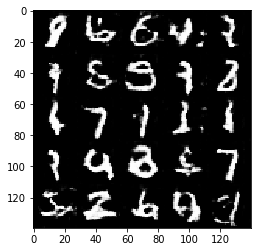

Epoch 1/2... Discriminator Loss: 1.4454... Generator Loss: 0.6630
Epoch 1/2... Discriminator Loss: 3.1055... Generator Loss: 0.0643
Epoch 1/2... Discriminator Loss: 1.1577... Generator Loss: 0.7193
Epoch 1/2... Discriminator Loss: 1.4418... Generator Loss: 4.2789
Epoch 1/2... Discriminator Loss: 0.7644... Generator Loss: 2.0447
Epoch 1/2... Discriminator Loss: 0.9306... Generator Loss: 1.0457
Epoch 1/2... Discriminator Loss: 3.6030... Generator Loss: 0.1757
Epoch 1/2... Discriminator Loss: 4.0117... Generator Loss: 0.0274
Epoch 1/2... Discriminator Loss: 0.8413... Generator Loss: 1.0479
Epoch 1/2... Discriminator Loss: 0.8683... Generator Loss: 0.9729


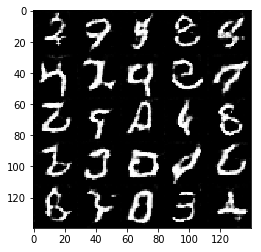

Epoch 1/2... Discriminator Loss: 1.3710... Generator Loss: 0.6143
Epoch 1/2... Discriminator Loss: 0.7640... Generator Loss: 1.4701
Epoch 1/2... Discriminator Loss: 0.3126... Generator Loss: 2.5325
Epoch 1/2... Discriminator Loss: 0.5081... Generator Loss: 2.6671
Epoch 1/2... Discriminator Loss: 0.5838... Generator Loss: 1.4919
Epoch 1/2... Discriminator Loss: 1.1355... Generator Loss: 1.1017
Epoch 1/2... Discriminator Loss: 1.3010... Generator Loss: 0.6061
Epoch 1/2... Discriminator Loss: 1.7431... Generator Loss: 0.5306
Epoch 1/2... Discriminator Loss: 0.4939... Generator Loss: 8.3880
Epoch 1/2... Discriminator Loss: 0.3457... Generator Loss: 2.4815


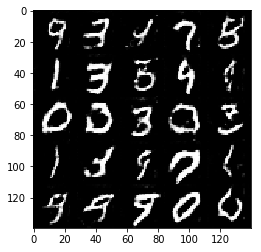

Epoch 1/2... Discriminator Loss: 2.4804... Generator Loss: 5.9020
Epoch 1/2... Discriminator Loss: 1.3606... Generator Loss: 0.4711
Epoch 1/2... Discriminator Loss: 0.1973... Generator Loss: 2.1651
Epoch 1/2... Discriminator Loss: 3.3677... Generator Loss: 0.8895
Epoch 1/2... Discriminator Loss: 2.3806... Generator Loss: 0.6320
Epoch 1/2... Discriminator Loss: 0.7002... Generator Loss: 5.2662
Epoch 1/2... Discriminator Loss: 0.7354... Generator Loss: 1.0159
Epoch 1/2... Discriminator Loss: 1.0485... Generator Loss: 1.0725
Epoch 1/2... Discriminator Loss: 0.2643... Generator Loss: 2.2139
Epoch 1/2... Discriminator Loss: 2.1076... Generator Loss: 0.5006


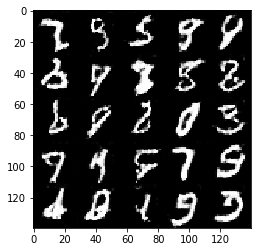

Epoch 1/2... Discriminator Loss: 0.3983... Generator Loss: 1.2887
Epoch 1/2... Discriminator Loss: 0.3521... Generator Loss: 2.4632
Epoch 1/2... Discriminator Loss: 0.5295... Generator Loss: 1.1967
Epoch 1/2... Discriminator Loss: 2.8893... Generator Loss: 0.1648
Epoch 1/2... Discriminator Loss: 0.6382... Generator Loss: 1.4560
Epoch 1/2... Discriminator Loss: 1.2751... Generator Loss: 0.7664
Epoch 1/2... Discriminator Loss: 1.4471... Generator Loss: 0.7550
Epoch 1/2... Discriminator Loss: 1.2000... Generator Loss: 1.0489
Epoch 1/2... Discriminator Loss: 2.0157... Generator Loss: 0.6757
Epoch 1/2... Discriminator Loss: 1.7689... Generator Loss: 0.4955


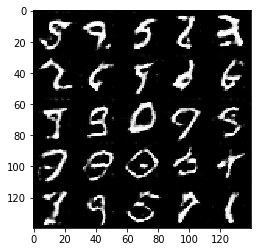

Epoch 1/2... Discriminator Loss: 1.1249... Generator Loss: 0.5831
Epoch 1/2... Discriminator Loss: 0.8177... Generator Loss: 1.0795
Epoch 1/2... Discriminator Loss: 0.2860... Generator Loss: 4.1095
Epoch 1/2... Discriminator Loss: 1.1222... Generator Loss: 0.6222
Epoch 1/2... Discriminator Loss: 2.1801... Generator Loss: 0.3765
Epoch 1/2... Discriminator Loss: 2.7044... Generator Loss: 0.5379
Epoch 1/2... Discriminator Loss: 0.3886... Generator Loss: 3.2172
Epoch 1/2... Discriminator Loss: 3.3032... Generator Loss: 0.1823
Epoch 1/2... Discriminator Loss: 0.4494... Generator Loss: 2.4929
Epoch 1/2... Discriminator Loss: 1.3675... Generator Loss: 0.5821


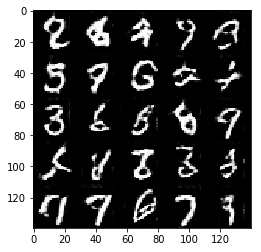

Epoch 1/2... Discriminator Loss: 0.7817... Generator Loss: 1.3516
Epoch 1/2... Discriminator Loss: 0.5390... Generator Loss: 1.2707
Epoch 1/2... Discriminator Loss: 2.1284... Generator Loss: 0.3017
Epoch 1/2... Discriminator Loss: 1.1803... Generator Loss: 0.5097
Epoch 1/2... Discriminator Loss: 2.4135... Generator Loss: 0.2056
Epoch 1/2... Discriminator Loss: 0.6347... Generator Loss: 1.4681
Epoch 1/2... Discriminator Loss: 1.7139... Generator Loss: 0.5249
Epoch 1/2... Discriminator Loss: 2.3641... Generator Loss: 0.4110
Epoch 1/2... Discriminator Loss: 1.7580... Generator Loss: 0.2924
Epoch 1/2... Discriminator Loss: 0.5025... Generator Loss: 2.0619


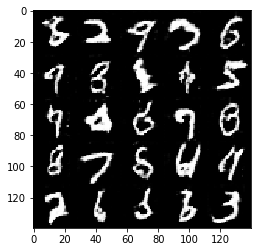

Epoch 1/2... Discriminator Loss: 3.2295... Generator Loss: 0.3437
Epoch 1/2... Discriminator Loss: 0.2669... Generator Loss: 2.7792
Epoch 1/2... Discriminator Loss: 1.9691... Generator Loss: 0.3375
Epoch 1/2... Discriminator Loss: 1.7901... Generator Loss: 0.4245
Epoch 1/2... Discriminator Loss: 0.4670... Generator Loss: 2.0201
Epoch 1/2... Discriminator Loss: 1.3501... Generator Loss: 0.8252
Epoch 1/2... Discriminator Loss: 0.3693... Generator Loss: 3.1427
Epoch 1/2... Discriminator Loss: 0.7374... Generator Loss: 1.4009
Epoch 1/2... Discriminator Loss: 0.6320... Generator Loss: 1.4541
Epoch 1/2... Discriminator Loss: 1.7274... Generator Loss: 1.3215


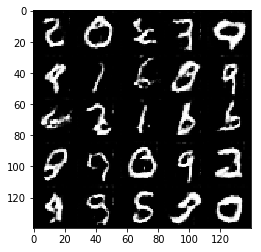

Epoch 1/2... Discriminator Loss: 1.1187... Generator Loss: 0.7004
Epoch 1/2... Discriminator Loss: 0.2905... Generator Loss: 3.4108
Epoch 1/2... Discriminator Loss: 0.6974... Generator Loss: 1.0966
Epoch 1/2... Discriminator Loss: 0.5961... Generator Loss: 1.6799
Epoch 1/2... Discriminator Loss: 1.5735... Generator Loss: 0.3882
Epoch 1/2... Discriminator Loss: 0.7888... Generator Loss: 1.9909
Epoch 1/2... Discriminator Loss: 1.0938... Generator Loss: 3.5317
Epoch 1/2... Discriminator Loss: 0.6468... Generator Loss: 1.5595
Epoch 1/2... Discriminator Loss: 1.2081... Generator Loss: 0.5826
Epoch 1/2... Discriminator Loss: 0.3865... Generator Loss: 2.1274


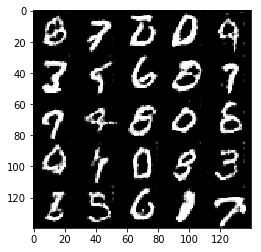

Epoch 1/2... Discriminator Loss: 1.1382... Generator Loss: 1.1737
Epoch 1/2... Discriminator Loss: 1.5803... Generator Loss: 0.4462
Epoch 1/2... Discriminator Loss: 0.9326... Generator Loss: 0.9092
Epoch 1/2... Discriminator Loss: 0.2178... Generator Loss: 2.8417
Epoch 1/2... Discriminator Loss: 0.7416... Generator Loss: 1.5995
Epoch 1/2... Discriminator Loss: 1.5534... Generator Loss: 0.9521
Epoch 1/2... Discriminator Loss: 0.2373... Generator Loss: 3.8165
Epoch 1/2... Discriminator Loss: 0.0862... Generator Loss: 4.1204
Epoch 1/2... Discriminator Loss: 0.4458... Generator Loss: 1.7790
Epoch 1/2... Discriminator Loss: 2.3075... Generator Loss: 0.3130


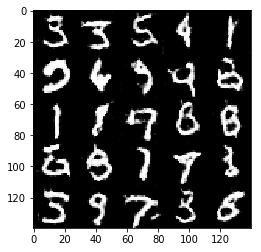

Epoch 1/2... Discriminator Loss: 1.0376... Generator Loss: 0.8346
Epoch 1/2... Discriminator Loss: 1.4917... Generator Loss: 0.4996
Epoch 1/2... Discriminator Loss: 1.8349... Generator Loss: 0.2322
Epoch 1/2... Discriminator Loss: 1.5809... Generator Loss: 0.3484
Epoch 1/2... Discriminator Loss: 1.5819... Generator Loss: 0.3949
Epoch 1/2... Discriminator Loss: 1.4064... Generator Loss: 0.4552
Epoch 1/2... Discriminator Loss: 0.8515... Generator Loss: 1.2527
Epoch 1/2... Discriminator Loss: 1.8291... Generator Loss: 0.3504
Epoch 1/2... Discriminator Loss: 0.4929... Generator Loss: 1.4199
Epoch 1/2... Discriminator Loss: 1.1585... Generator Loss: 0.6671


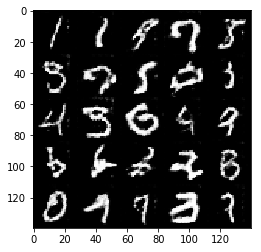

Epoch 1/2... Discriminator Loss: 0.4017... Generator Loss: 1.3725
Epoch 1/2... Discriminator Loss: 4.0412... Generator Loss: 0.0416
Epoch 1/2... Discriminator Loss: 0.3153... Generator Loss: 1.9812
Epoch 1/2... Discriminator Loss: 1.5023... Generator Loss: 1.1811
Epoch 1/2... Discriminator Loss: 1.0866... Generator Loss: 0.9424
Epoch 1/2... Discriminator Loss: 0.2704... Generator Loss: 2.1150
Epoch 1/2... Discriminator Loss: 1.1849... Generator Loss: 2.0343
Epoch 1/2... Discriminator Loss: 0.8448... Generator Loss: 1.0800
Epoch 1/2... Discriminator Loss: 0.3791... Generator Loss: 2.1423
Epoch 1/2... Discriminator Loss: 1.1247... Generator Loss: 1.0907


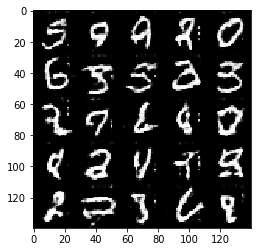

Epoch 1/2... Discriminator Loss: 0.5084... Generator Loss: 2.2426
Epoch 1/2... Discriminator Loss: 1.0546... Generator Loss: 0.9445
Epoch 1/2... Discriminator Loss: 0.7605... Generator Loss: 1.7829
Epoch 1/2... Discriminator Loss: 0.2938... Generator Loss: 2.0434
Epoch 1/2... Discriminator Loss: 0.7284... Generator Loss: 1.1035
Epoch 1/2... Discriminator Loss: 1.0287... Generator Loss: 0.8465
Epoch 1/2... Discriminator Loss: 0.1708... Generator Loss: 3.1517
Epoch 1/2... Discriminator Loss: 0.2889... Generator Loss: 2.0510
Epoch 1/2... Discriminator Loss: 3.1428... Generator Loss: 0.5222
Epoch 1/2... Discriminator Loss: 0.4568... Generator Loss: 1.7564


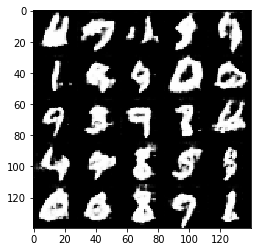

Epoch 1/2... Discriminator Loss: 1.9671... Generator Loss: 0.4756
Epoch 1/2... Discriminator Loss: 0.7527... Generator Loss: 1.8186
Epoch 1/2... Discriminator Loss: 2.4827... Generator Loss: 0.5282
Epoch 1/2... Discriminator Loss: 0.6755... Generator Loss: 1.3086
Epoch 1/2... Discriminator Loss: 0.4579... Generator Loss: 1.5694
Epoch 1/2... Discriminator Loss: 1.3898... Generator Loss: 0.4868
Epoch 1/2... Discriminator Loss: 4.1844... Generator Loss: 0.0545
Epoch 1/2... Discriminator Loss: 0.7142... Generator Loss: 0.8823
Epoch 1/2... Discriminator Loss: 1.5139... Generator Loss: 0.3092
Epoch 1/2... Discriminator Loss: 1.5918... Generator Loss: 0.8737


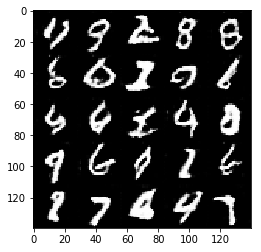

Epoch 1/2... Discriminator Loss: 0.6491... Generator Loss: 1.9401
Epoch 1/2... Discriminator Loss: 0.5387... Generator Loss: 1.9901
Epoch 1/2... Discriminator Loss: 0.2947... Generator Loss: 1.9218
Epoch 1/2... Discriminator Loss: 0.7428... Generator Loss: 0.9419
Epoch 1/2... Discriminator Loss: 1.4641... Generator Loss: 0.6244
Epoch 1/2... Discriminator Loss: 1.4602... Generator Loss: 0.5768
Epoch 1/2... Discriminator Loss: 1.2798... Generator Loss: 0.5228
Epoch 1/2... Discriminator Loss: 0.7634... Generator Loss: 1.0015
Epoch 1/2... Discriminator Loss: 0.9630... Generator Loss: 1.7842
Epoch 1/2... Discriminator Loss: 2.1168... Generator Loss: 0.7899


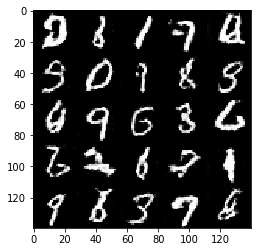

Epoch 1/2... Discriminator Loss: 0.9396... Generator Loss: 0.7049
Epoch 1/2... Discriminator Loss: 2.3652... Generator Loss: 0.2547
Epoch 1/2... Discriminator Loss: 2.7510... Generator Loss: 0.3030
Epoch 1/2... Discriminator Loss: 1.3778... Generator Loss: 0.5141
Epoch 1/2... Discriminator Loss: 0.6953... Generator Loss: 0.9232
Epoch 1/2... Discriminator Loss: 1.7781... Generator Loss: 0.3122
Epoch 1/2... Discriminator Loss: 0.5777... Generator Loss: 1.5793
Epoch 1/2... Discriminator Loss: 0.6699... Generator Loss: 1.6142
Epoch 1/2... Discriminator Loss: 0.0664... Generator Loss: 4.7033
Epoch 1/2... Discriminator Loss: 0.1549... Generator Loss: 3.2286


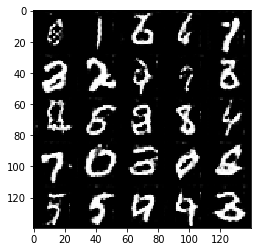

Epoch 1/2... Discriminator Loss: 0.0918... Generator Loss: 3.3648
Epoch 1/2... Discriminator Loss: 0.7076... Generator Loss: 2.3072
Epoch 1/2... Discriminator Loss: 0.7549... Generator Loss: 5.6276
Epoch 1/2... Discriminator Loss: 2.8410... Generator Loss: 0.1172
Epoch 1/2... Discriminator Loss: 0.9205... Generator Loss: 1.4953
Epoch 1/2... Discriminator Loss: 3.2617... Generator Loss: 0.1542
Epoch 1/2... Discriminator Loss: 0.2162... Generator Loss: 3.7558
Epoch 1/2... Discriminator Loss: 0.7290... Generator Loss: 1.3114
Epoch 1/2... Discriminator Loss: 1.8109... Generator Loss: 0.6053
Epoch 1/2... Discriminator Loss: 2.3783... Generator Loss: 0.2011


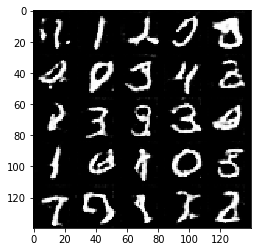

Epoch 1/2... Discriminator Loss: 1.4564... Generator Loss: 0.7891
Epoch 1/2... Discriminator Loss: 0.4175... Generator Loss: 5.4624
Epoch 1/2... Discriminator Loss: 2.3406... Generator Loss: 0.1893
Epoch 1/2... Discriminator Loss: 0.9955... Generator Loss: 1.4569
Epoch 1/2... Discriminator Loss: 2.7640... Generator Loss: 0.1179
Epoch 1/2... Discriminator Loss: 0.0983... Generator Loss: 3.5960
Epoch 1/2... Discriminator Loss: 0.3720... Generator Loss: 2.1633
Epoch 1/2... Discriminator Loss: 1.3200... Generator Loss: 1.0739
Epoch 1/2... Discriminator Loss: 0.5377... Generator Loss: 2.5338
Epoch 1/2... Discriminator Loss: 1.3407... Generator Loss: 1.0427


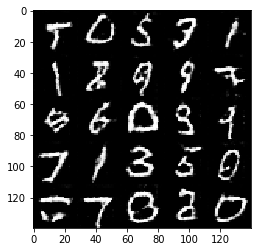

Epoch 2/2... Discriminator Loss: 0.1420... Generator Loss: 7.5621
Epoch 2/2... Discriminator Loss: 1.0279... Generator Loss: 1.4100
Epoch 2/2... Discriminator Loss: 2.2103... Generator Loss: 0.8102
Epoch 2/2... Discriminator Loss: 0.1601... Generator Loss: 3.4635
Epoch 2/2... Discriminator Loss: 0.2897... Generator Loss: 2.1228
Epoch 2/2... Discriminator Loss: 0.4188... Generator Loss: 2.4742
Epoch 2/2... Discriminator Loss: 0.8284... Generator Loss: 0.8702
Epoch 2/2... Discriminator Loss: 1.3997... Generator Loss: 0.4213
Epoch 2/2... Discriminator Loss: 1.9286... Generator Loss: 0.3253
Epoch 2/2... Discriminator Loss: 0.3390... Generator Loss: 1.6298


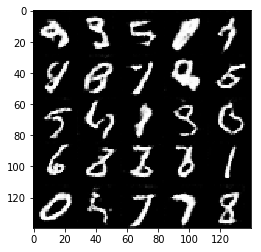

Epoch 2/2... Discriminator Loss: 0.1539... Generator Loss: 3.8034
Epoch 2/2... Discriminator Loss: 1.3247... Generator Loss: 1.0798
Epoch 2/2... Discriminator Loss: 2.6101... Generator Loss: 0.2368
Epoch 2/2... Discriminator Loss: 0.6497... Generator Loss: 1.4973
Epoch 2/2... Discriminator Loss: 4.7127... Generator Loss: 0.0228
Epoch 2/2... Discriminator Loss: 1.0824... Generator Loss: 1.2960
Epoch 2/2... Discriminator Loss: 0.6016... Generator Loss: 1.4882
Epoch 2/2... Discriminator Loss: 1.5735... Generator Loss: 0.4118
Epoch 2/2... Discriminator Loss: 0.6230... Generator Loss: 1.5839
Epoch 2/2... Discriminator Loss: 2.4268... Generator Loss: 0.1466


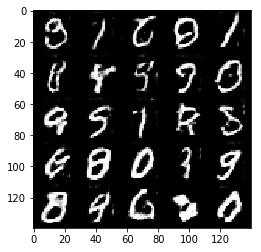

Epoch 2/2... Discriminator Loss: 1.0908... Generator Loss: 0.7642
Epoch 2/2... Discriminator Loss: 0.7023... Generator Loss: 1.4326
Epoch 2/2... Discriminator Loss: 3.9929... Generator Loss: 0.0406
Epoch 2/2... Discriminator Loss: 0.8995... Generator Loss: 1.3282
Epoch 2/2... Discriminator Loss: 0.1840... Generator Loss: 2.2725
Epoch 2/2... Discriminator Loss: 0.5742... Generator Loss: 1.2850
Epoch 2/2... Discriminator Loss: 0.3023... Generator Loss: 2.5931
Epoch 2/2... Discriminator Loss: 1.1993... Generator Loss: 0.7035
Epoch 2/2... Discriminator Loss: 0.8189... Generator Loss: 1.3271
Epoch 2/2... Discriminator Loss: 0.3960... Generator Loss: 2.1702


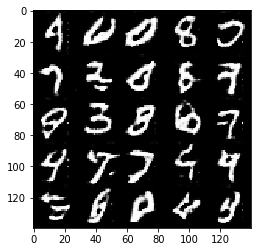

Epoch 2/2... Discriminator Loss: 1.3599... Generator Loss: 0.4343
Epoch 2/2... Discriminator Loss: 1.2215... Generator Loss: 0.6728
Epoch 2/2... Discriminator Loss: 0.7342... Generator Loss: 1.4640
Epoch 2/2... Discriminator Loss: 1.6319... Generator Loss: 0.3946
Epoch 2/2... Discriminator Loss: 0.9663... Generator Loss: 1.0559
Epoch 2/2... Discriminator Loss: 0.4928... Generator Loss: 1.5187
Epoch 2/2... Discriminator Loss: 0.0720... Generator Loss: 5.6633
Epoch 2/2... Discriminator Loss: 1.4813... Generator Loss: 0.8217
Epoch 2/2... Discriminator Loss: 0.8914... Generator Loss: 4.0017
Epoch 2/2... Discriminator Loss: 1.9649... Generator Loss: 0.3765


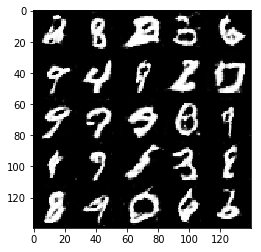

Epoch 2/2... Discriminator Loss: 3.4449... Generator Loss: 0.0868
Epoch 2/2... Discriminator Loss: 2.3612... Generator Loss: 0.2190
Epoch 2/2... Discriminator Loss: 0.7585... Generator Loss: 0.8782
Epoch 2/2... Discriminator Loss: 0.5246... Generator Loss: 1.6240
Epoch 2/2... Discriminator Loss: 2.0107... Generator Loss: 0.1800
Epoch 2/2... Discriminator Loss: 0.5513... Generator Loss: 1.5521
Epoch 2/2... Discriminator Loss: 0.2614... Generator Loss: 1.6958
Epoch 2/2... Discriminator Loss: 0.9388... Generator Loss: 1.0916
Epoch 2/2... Discriminator Loss: 0.9527... Generator Loss: 0.6957
Epoch 2/2... Discriminator Loss: 2.4211... Generator Loss: 0.2024


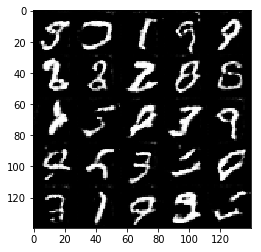

Epoch 2/2... Discriminator Loss: 1.4342... Generator Loss: 0.9839
Epoch 2/2... Discriminator Loss: 1.0879... Generator Loss: 0.7491
Epoch 2/2... Discriminator Loss: 1.1287... Generator Loss: 0.5403
Epoch 2/2... Discriminator Loss: 0.2191... Generator Loss: 2.5775
Epoch 2/2... Discriminator Loss: 0.2270... Generator Loss: 2.8537
Epoch 2/2... Discriminator Loss: 0.1206... Generator Loss: 3.0656
Epoch 2/2... Discriminator Loss: 1.6212... Generator Loss: 0.5252
Epoch 2/2... Discriminator Loss: 4.0165... Generator Loss: 0.0484
Epoch 2/2... Discriminator Loss: 0.6505... Generator Loss: 1.6342
Epoch 2/2... Discriminator Loss: 0.2100... Generator Loss: 2.7089


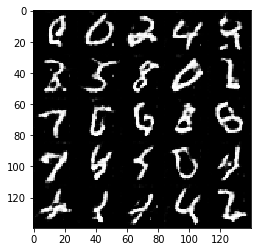

Epoch 2/2... Discriminator Loss: 0.2583... Generator Loss: 2.7433
Epoch 2/2... Discriminator Loss: 1.0221... Generator Loss: 0.5501
Epoch 2/2... Discriminator Loss: 1.1068... Generator Loss: 1.0745
Epoch 2/2... Discriminator Loss: 1.4640... Generator Loss: 0.5940
Epoch 2/2... Discriminator Loss: 0.3334... Generator Loss: 1.8358
Epoch 2/2... Discriminator Loss: 0.5808... Generator Loss: 2.1583
Epoch 2/2... Discriminator Loss: 1.0660... Generator Loss: 0.7944
Epoch 2/2... Discriminator Loss: 0.3202... Generator Loss: 2.7523
Epoch 2/2... Discriminator Loss: 0.3029... Generator Loss: 2.2339
Epoch 2/2... Discriminator Loss: 0.7565... Generator Loss: 1.0231


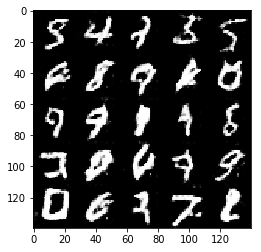

Epoch 2/2... Discriminator Loss: 1.2211... Generator Loss: 0.6675
Epoch 2/2... Discriminator Loss: 1.6650... Generator Loss: 0.5415
Epoch 2/2... Discriminator Loss: 0.2556... Generator Loss: 2.2389
Epoch 2/2... Discriminator Loss: 0.8703... Generator Loss: 1.5093
Epoch 2/2... Discriminator Loss: 1.4341... Generator Loss: 0.9614
Epoch 2/2... Discriminator Loss: 1.7046... Generator Loss: 0.7356
Epoch 2/2... Discriminator Loss: 1.3080... Generator Loss: 0.6133
Epoch 2/2... Discriminator Loss: 1.1418... Generator Loss: 0.8727
Epoch 2/2... Discriminator Loss: 2.2806... Generator Loss: 0.1772
Epoch 2/2... Discriminator Loss: 0.4853... Generator Loss: 1.9288


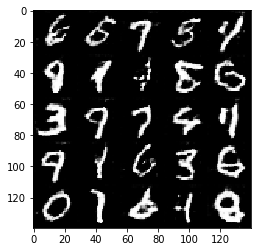

Epoch 2/2... Discriminator Loss: 1.4437... Generator Loss: 0.5078
Epoch 2/2... Discriminator Loss: 1.2555... Generator Loss: 0.6024
Epoch 2/2... Discriminator Loss: 0.4248... Generator Loss: 1.1984
Epoch 2/2... Discriminator Loss: 1.8407... Generator Loss: 0.4848
Epoch 2/2... Discriminator Loss: 1.2038... Generator Loss: 1.3437
Epoch 2/2... Discriminator Loss: 0.6384... Generator Loss: 1.4652
Epoch 2/2... Discriminator Loss: 1.8194... Generator Loss: 0.6691
Epoch 2/2... Discriminator Loss: 1.2728... Generator Loss: 0.6660
Epoch 2/2... Discriminator Loss: 0.1106... Generator Loss: 2.8365
Epoch 2/2... Discriminator Loss: 0.5058... Generator Loss: 1.5625


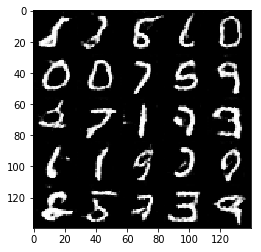

Epoch 2/2... Discriminator Loss: 0.5676... Generator Loss: 1.5229
Epoch 2/2... Discriminator Loss: 0.9567... Generator Loss: 0.9202
Epoch 2/2... Discriminator Loss: 1.1813... Generator Loss: 0.5778
Epoch 2/2... Discriminator Loss: 2.0344... Generator Loss: 0.3463
Epoch 2/2... Discriminator Loss: 0.7464... Generator Loss: 1.3853
Epoch 2/2... Discriminator Loss: 1.6439... Generator Loss: 1.1015
Epoch 2/2... Discriminator Loss: 0.2214... Generator Loss: 2.8906
Epoch 2/2... Discriminator Loss: 2.3019... Generator Loss: 0.2099
Epoch 2/2... Discriminator Loss: 0.0316... Generator Loss: 5.5571
Epoch 2/2... Discriminator Loss: 0.9020... Generator Loss: 0.7132


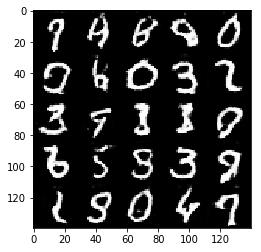

Epoch 2/2... Discriminator Loss: 4.0116... Generator Loss: 0.0505
Epoch 2/2... Discriminator Loss: 0.7312... Generator Loss: 1.6213
Epoch 2/2... Discriminator Loss: 0.1704... Generator Loss: 3.1693
Epoch 2/2... Discriminator Loss: 1.3502... Generator Loss: 0.4952
Epoch 2/2... Discriminator Loss: 1.2610... Generator Loss: 0.6071
Epoch 2/2... Discriminator Loss: 0.3129... Generator Loss: 1.8329
Epoch 2/2... Discriminator Loss: 1.2294... Generator Loss: 0.7292
Epoch 2/2... Discriminator Loss: 2.4930... Generator Loss: 0.1996
Epoch 2/2... Discriminator Loss: 0.9115... Generator Loss: 1.0698
Epoch 2/2... Discriminator Loss: 0.4588... Generator Loss: 2.0669


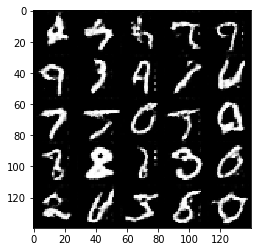

Epoch 2/2... Discriminator Loss: 0.5630... Generator Loss: 4.3239
Epoch 2/2... Discriminator Loss: 1.1720... Generator Loss: 1.3637
Epoch 2/2... Discriminator Loss: 1.4475... Generator Loss: 1.0701
Epoch 2/2... Discriminator Loss: 2.6287... Generator Loss: 0.5913
Epoch 2/2... Discriminator Loss: 0.5543... Generator Loss: 2.1599
Epoch 2/2... Discriminator Loss: 0.2029... Generator Loss: 3.4735
Epoch 2/2... Discriminator Loss: 0.8750... Generator Loss: 0.6514
Epoch 2/2... Discriminator Loss: 0.1930... Generator Loss: 2.9954
Epoch 2/2... Discriminator Loss: 1.8126... Generator Loss: 1.0881
Epoch 2/2... Discriminator Loss: 1.8001... Generator Loss: 0.4331


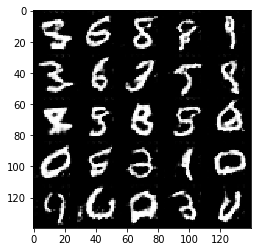

Epoch 2/2... Discriminator Loss: 0.3179... Generator Loss: 1.7374
Epoch 2/2... Discriminator Loss: 0.2212... Generator Loss: 2.4748
Epoch 2/2... Discriminator Loss: 1.4111... Generator Loss: 0.5485
Epoch 2/2... Discriminator Loss: 1.6656... Generator Loss: 0.3245
Epoch 2/2... Discriminator Loss: 0.6028... Generator Loss: 1.2610
Epoch 2/2... Discriminator Loss: 0.2605... Generator Loss: 2.7713
Epoch 2/2... Discriminator Loss: 0.9432... Generator Loss: 1.2291
Epoch 2/2... Discriminator Loss: 0.8999... Generator Loss: 0.8613
Epoch 2/2... Discriminator Loss: 1.9271... Generator Loss: 0.4770
Epoch 2/2... Discriminator Loss: 0.4294... Generator Loss: 2.1251


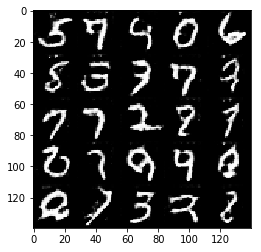

Epoch 2/2... Discriminator Loss: 3.1328... Generator Loss: 0.0918
Epoch 2/2... Discriminator Loss: 0.6891... Generator Loss: 1.1655
Epoch 2/2... Discriminator Loss: 2.3058... Generator Loss: 0.1569
Epoch 2/2... Discriminator Loss: 0.7143... Generator Loss: 1.3335
Epoch 2/2... Discriminator Loss: 0.3229... Generator Loss: 1.6905
Epoch 2/2... Discriminator Loss: 0.6732... Generator Loss: 1.3956
Epoch 2/2... Discriminator Loss: 0.7116... Generator Loss: 1.7991
Epoch 2/2... Discriminator Loss: 0.2240... Generator Loss: 1.9893
Epoch 2/2... Discriminator Loss: 1.7887... Generator Loss: 0.4800
Epoch 2/2... Discriminator Loss: 0.0582... Generator Loss: 7.0241


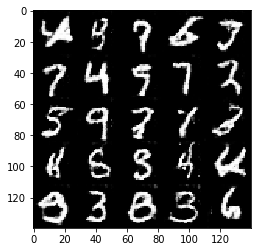

Epoch 2/2... Discriminator Loss: 1.8419... Generator Loss: 0.2877
Epoch 2/2... Discriminator Loss: 0.3406... Generator Loss: 6.1958
Epoch 2/2... Discriminator Loss: 0.3073... Generator Loss: 4.7175
Epoch 2/2... Discriminator Loss: 1.1354... Generator Loss: 0.5150
Epoch 2/2... Discriminator Loss: 1.5837... Generator Loss: 0.5287
Epoch 2/2... Discriminator Loss: 0.6209... Generator Loss: 2.1126
Epoch 2/2... Discriminator Loss: 0.8733... Generator Loss: 1.1918
Epoch 2/2... Discriminator Loss: 0.7399... Generator Loss: 1.4628
Epoch 2/2... Discriminator Loss: 1.6818... Generator Loss: 0.3281
Epoch 2/2... Discriminator Loss: 0.4587... Generator Loss: 4.1572


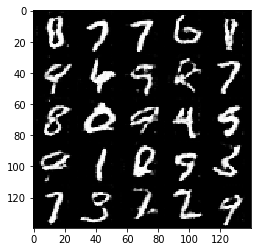

Epoch 2/2... Discriminator Loss: 0.5585... Generator Loss: 2.0821
Epoch 2/2... Discriminator Loss: 0.2429... Generator Loss: 2.2757
Epoch 2/2... Discriminator Loss: 0.9100... Generator Loss: 0.9386
Epoch 2/2... Discriminator Loss: 1.5842... Generator Loss: 0.5519
Epoch 2/2... Discriminator Loss: 0.1888... Generator Loss: 2.8849
Epoch 2/2... Discriminator Loss: 1.0665... Generator Loss: 3.7479
Epoch 2/2... Discriminator Loss: 0.9725... Generator Loss: 0.9835
Epoch 2/2... Discriminator Loss: 0.4460... Generator Loss: 1.3235
Epoch 2/2... Discriminator Loss: 2.5114... Generator Loss: 0.4667
Epoch 2/2... Discriminator Loss: 0.5205... Generator Loss: 1.8514


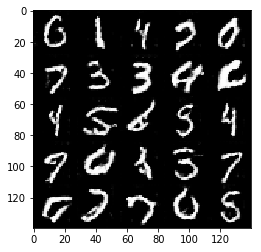

Epoch 2/2... Discriminator Loss: 1.2018... Generator Loss: 0.9903
Epoch 2/2... Discriminator Loss: 1.2976... Generator Loss: 0.7077
Epoch 2/2... Discriminator Loss: 0.4708... Generator Loss: 1.5100
Epoch 2/2... Discriminator Loss: 1.3475... Generator Loss: 0.4290
Epoch 2/2... Discriminator Loss: 1.7574... Generator Loss: 0.6592
Epoch 2/2... Discriminator Loss: 0.2222... Generator Loss: 2.2554
Epoch 2/2... Discriminator Loss: 0.8347... Generator Loss: 0.9689
Epoch 2/2... Discriminator Loss: 0.3417... Generator Loss: 2.3240
Epoch 2/2... Discriminator Loss: 0.3611... Generator Loss: 1.5094
Epoch 2/2... Discriminator Loss: 3.5634... Generator Loss: 0.0767


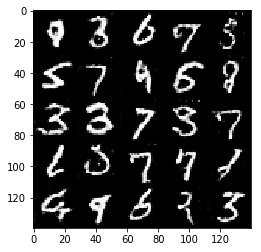

Epoch 2/2... Discriminator Loss: 1.1472... Generator Loss: 0.9602
Epoch 2/2... Discriminator Loss: 1.6289... Generator Loss: 0.6118
Epoch 2/2... Discriminator Loss: 0.6389... Generator Loss: 1.1763
Epoch 2/2... Discriminator Loss: 0.4333... Generator Loss: 1.4917
Epoch 2/2... Discriminator Loss: 0.0683... Generator Loss: 4.0293
Epoch 2/2... Discriminator Loss: 0.3421... Generator Loss: 1.9113
Epoch 2/2... Discriminator Loss: 1.6607... Generator Loss: 0.2650
Epoch 2/2... Discriminator Loss: 0.5081... Generator Loss: 4.1670
Epoch 2/2... Discriminator Loss: 0.2427... Generator Loss: 2.9853
Epoch 2/2... Discriminator Loss: 1.2890... Generator Loss: 0.6241


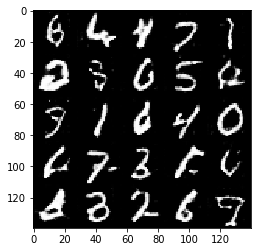

Epoch 2/2... Discriminator Loss: 0.3752... Generator Loss: 2.6182
Epoch 2/2... Discriminator Loss: 0.6867... Generator Loss: 4.1458
Epoch 2/2... Discriminator Loss: 1.9476... Generator Loss: 0.5085
Epoch 2/2... Discriminator Loss: 0.9383... Generator Loss: 0.9590
Epoch 2/2... Discriminator Loss: 0.5781... Generator Loss: 0.9590
Epoch 2/2... Discriminator Loss: 1.1761... Generator Loss: 1.4474
Epoch 2/2... Discriminator Loss: 0.2145... Generator Loss: 2.8002
Epoch 2/2... Discriminator Loss: 1.6724... Generator Loss: 0.3053
Epoch 2/2... Discriminator Loss: 0.8626... Generator Loss: 1.1996
Epoch 2/2... Discriminator Loss: 0.1885... Generator Loss: 4.1903


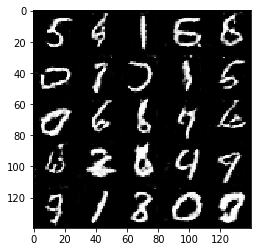

Epoch 2/2... Discriminator Loss: 3.2114... Generator Loss: 0.1789
Epoch 2/2... Discriminator Loss: 0.6617... Generator Loss: 1.5037
Epoch 2/2... Discriminator Loss: 0.3478... Generator Loss: 2.0350
Epoch 2/2... Discriminator Loss: 0.2654... Generator Loss: 8.0446
Epoch 2/2... Discriminator Loss: 0.5147... Generator Loss: 3.1199
Epoch 2/2... Discriminator Loss: 0.5695... Generator Loss: 1.3135
Epoch 2/2... Discriminator Loss: 1.6368... Generator Loss: 0.4647
Epoch 2/2... Discriminator Loss: 2.0212... Generator Loss: 0.2859
Epoch 2/2... Discriminator Loss: 2.4046... Generator Loss: 0.4797
Epoch 2/2... Discriminator Loss: 1.1372... Generator Loss: 0.8498


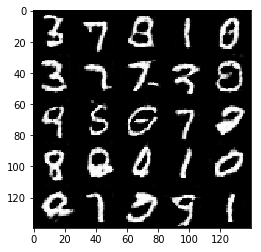

Epoch 2/2... Discriminator Loss: 0.9320... Generator Loss: 1.1240
Epoch 2/2... Discriminator Loss: 1.7000... Generator Loss: 0.5688
Epoch 2/2... Discriminator Loss: 1.4932... Generator Loss: 0.5249
Epoch 2/2... Discriminator Loss: 1.0998... Generator Loss: 0.7759
Epoch 2/2... Discriminator Loss: 0.7988... Generator Loss: 2.5492
Epoch 2/2... Discriminator Loss: 0.5138... Generator Loss: 2.0072
Epoch 2/2... Discriminator Loss: 1.8320... Generator Loss: 0.6713
Epoch 2/2... Discriminator Loss: 0.3179... Generator Loss: 2.0957
Epoch 2/2... Discriminator Loss: 2.8595... Generator Loss: 0.0853
Epoch 2/2... Discriminator Loss: 0.3165... Generator Loss: 2.0000


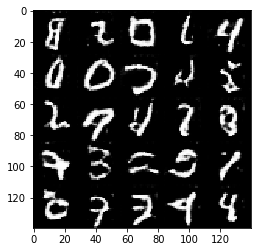

Epoch 2/2... Discriminator Loss: 0.7947... Generator Loss: 1.0839
Epoch 2/2... Discriminator Loss: 0.3489... Generator Loss: 2.2340
Epoch 2/2... Discriminator Loss: 0.0331... Generator Loss: 4.5359
Epoch 2/2... Discriminator Loss: 3.6542... Generator Loss: 0.0825
Epoch 2/2... Discriminator Loss: 0.4988... Generator Loss: 2.2048
Epoch 2/2... Discriminator Loss: 0.2313... Generator Loss: 2.9989
Epoch 2/2... Discriminator Loss: 0.2330... Generator Loss: 1.9334
Epoch 2/2... Discriminator Loss: 0.0793... Generator Loss: 4.5094
Epoch 2/2... Discriminator Loss: 0.8424... Generator Loss: 0.8241
Epoch 2/2... Discriminator Loss: 1.7905... Generator Loss: 0.2758


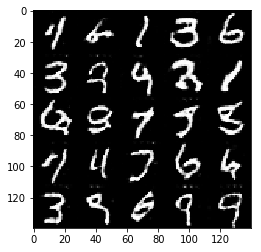

Epoch 2/2... Discriminator Loss: 1.3531... Generator Loss: 0.7221
Epoch 2/2... Discriminator Loss: 0.3683... Generator Loss: 1.6114
Epoch 2/2... Discriminator Loss: 1.6951... Generator Loss: 0.4684
Epoch 2/2... Discriminator Loss: 2.3110... Generator Loss: 0.4003
Epoch 2/2... Discriminator Loss: 2.0519... Generator Loss: 0.3754
Epoch 2/2... Discriminator Loss: 0.0075... Generator Loss: 7.6216
Epoch 2/2... Discriminator Loss: 0.9224... Generator Loss: 0.7922
Epoch 2/2... Discriminator Loss: 0.8856... Generator Loss: 1.7268
Epoch 2/2... Discriminator Loss: 0.8056... Generator Loss: 1.0019
Epoch 2/2... Discriminator Loss: 0.3038... Generator Loss: 2.4605


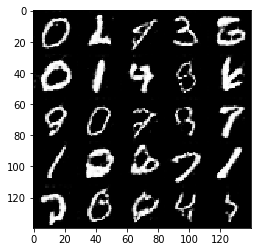

Epoch 2/2... Discriminator Loss: 0.8724... Generator Loss: 1.8480
Epoch 2/2... Discriminator Loss: 0.0803... Generator Loss: 3.3416
Epoch 2/2... Discriminator Loss: 1.2598... Generator Loss: 0.8522
Epoch 2/2... Discriminator Loss: 1.1247... Generator Loss: 0.7874
Epoch 2/2... Discriminator Loss: 0.6592... Generator Loss: 1.1087
Epoch 2/2... Discriminator Loss: 0.4576... Generator Loss: 1.6892
Epoch 2/2... Discriminator Loss: 0.3554... Generator Loss: 2.2221
Epoch 2/2... Discriminator Loss: 0.4498... Generator Loss: 2.9923
Epoch 2/2... Discriminator Loss: 0.9558... Generator Loss: 0.9623
Epoch 2/2... Discriminator Loss: 1.0961... Generator Loss: 0.7400


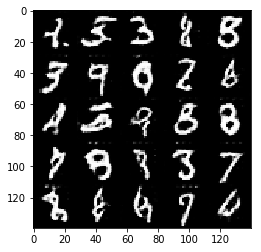

Epoch 2/2... Discriminator Loss: 1.7595... Generator Loss: 0.2713
Epoch 2/2... Discriminator Loss: 0.1095... Generator Loss: 4.4019
Epoch 2/2... Discriminator Loss: 0.7727... Generator Loss: 1.0015
Epoch 2/2... Discriminator Loss: 2.5253... Generator Loss: 0.1386
Epoch 2/2... Discriminator Loss: 0.2786... Generator Loss: 2.4529
Epoch 2/2... Discriminator Loss: 4.3584... Generator Loss: 0.0236
Epoch 2/2... Discriminator Loss: 2.7158... Generator Loss: 0.1319
Epoch 2/2... Discriminator Loss: 1.6759... Generator Loss: 0.2813
Epoch 2/2... Discriminator Loss: 0.4185... Generator Loss: 2.3395
Epoch 2/2... Discriminator Loss: 0.3064... Generator Loss: 3.7059


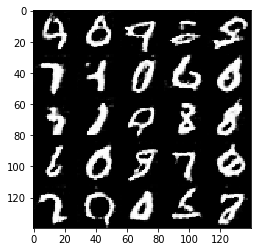

Epoch 2/2... Discriminator Loss: 0.1193... Generator Loss: 2.6360
Epoch 2/2... Discriminator Loss: 1.0400... Generator Loss: 0.7636
Epoch 2/2... Discriminator Loss: 2.5884... Generator Loss: 7.3093
Epoch 2/2... Discriminator Loss: 1.0135... Generator Loss: 0.8843
Epoch 2/2... Discriminator Loss: 0.3844... Generator Loss: 1.6013
Epoch 2/2... Discriminator Loss: 0.6021... Generator Loss: 2.7884
Epoch 2/2... Discriminator Loss: 2.6525... Generator Loss: 0.2949
Epoch 2/2... Discriminator Loss: 0.1046... Generator Loss: 4.2454
Epoch 2/2... Discriminator Loss: 0.0541... Generator Loss: 5.1472
Epoch 2/2... Discriminator Loss: 0.0220... Generator Loss: 5.9562


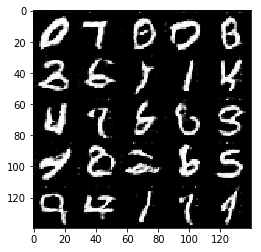

Epoch 2/2... Discriminator Loss: 1.1890... Generator Loss: 1.2141
Epoch 2/2... Discriminator Loss: 0.3692... Generator Loss: 2.6154
Epoch 2/2... Discriminator Loss: 1.6312... Generator Loss: 0.4555
Epoch 2/2... Discriminator Loss: 0.5527... Generator Loss: 4.4731
Epoch 2/2... Discriminator Loss: 2.1255... Generator Loss: 0.1834
Epoch 2/2... Discriminator Loss: 1.3441... Generator Loss: 0.9163
Epoch 2/2... Discriminator Loss: 1.5332... Generator Loss: 0.8838
Epoch 2/2... Discriminator Loss: 0.6631... Generator Loss: 1.2995
Epoch 2/2... Discriminator Loss: 0.8556... Generator Loss: 0.9713
Epoch 2/2... Discriminator Loss: 0.9626... Generator Loss: 2.6529


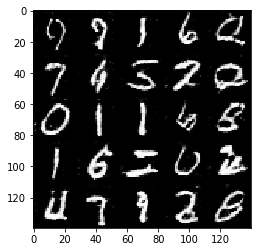

Epoch 2/2... Discriminator Loss: 0.0515... Generator Loss: 4.8087
Epoch 2/2... Discriminator Loss: 0.6701... Generator Loss: 1.4470
Epoch 2/2... Discriminator Loss: 0.4395... Generator Loss: 5.0931
Epoch 2/2... Discriminator Loss: 0.5288... Generator Loss: 1.9183
Epoch 2/2... Discriminator Loss: 1.2723... Generator Loss: 0.5924
Epoch 2/2... Discriminator Loss: 0.1882... Generator Loss: 3.8925
Epoch 2/2... Discriminator Loss: 0.4583... Generator Loss: 2.2473
Epoch 2/2... Discriminator Loss: 0.2435... Generator Loss: 2.8910
Epoch 2/2... Discriminator Loss: 0.2933... Generator Loss: 2.0769
Epoch 2/2... Discriminator Loss: 0.8500... Generator Loss: 0.8434


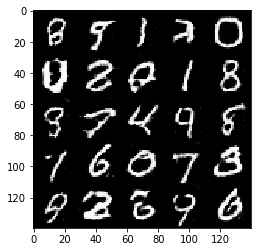

Epoch 2/2... Discriminator Loss: 0.3691... Generator Loss: 1.8938
Epoch 2/2... Discriminator Loss: 0.6918... Generator Loss: 1.0456
Epoch 2/2... Discriminator Loss: 0.8734... Generator Loss: 1.2571
Epoch 2/2... Discriminator Loss: 1.0425... Generator Loss: 0.8285
Epoch 2/2... Discriminator Loss: 0.4416... Generator Loss: 1.6984
Epoch 2/2... Discriminator Loss: 0.8229... Generator Loss: 1.1620
Epoch 2/2... Discriminator Loss: 1.2298... Generator Loss: 0.6593
Epoch 2/2... Discriminator Loss: 1.3855... Generator Loss: 0.4682
Epoch 2/2... Discriminator Loss: 1.7624... Generator Loss: 0.6548
Epoch 2/2... Discriminator Loss: 1.1851... Generator Loss: 0.6991


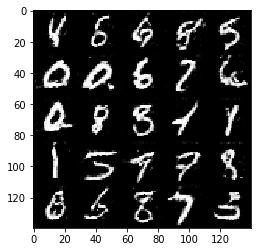

Epoch 2/2... Discriminator Loss: 0.2389... Generator Loss: 2.9154
Epoch 2/2... Discriminator Loss: 0.4081... Generator Loss: 1.8193
Epoch 2/2... Discriminator Loss: 0.3977... Generator Loss: 1.7954
Epoch 2/2... Discriminator Loss: 3.6816... Generator Loss: 0.0447
Epoch 2/2... Discriminator Loss: 0.8207... Generator Loss: 0.8076
Epoch 2/2... Discriminator Loss: 1.7447... Generator Loss: 4.3787
Epoch 2/2... Discriminator Loss: 3.3253... Generator Loss: 0.0844
Epoch 2/2... Discriminator Loss: 1.2273... Generator Loss: 0.6708
Epoch 2/2... Discriminator Loss: 0.2477... Generator Loss: 1.9005
Epoch 2/2... Discriminator Loss: 1.8758... Generator Loss: 0.2926


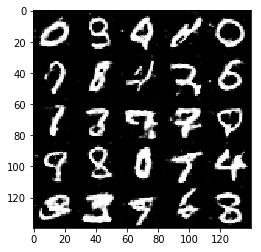

Epoch 2/2... Discriminator Loss: 0.6147... Generator Loss: 1.1682
Epoch 2/2... Discriminator Loss: 1.3809... Generator Loss: 0.8694
Epoch 2/2... Discriminator Loss: 0.8247... Generator Loss: 0.6593
Epoch 2/2... Discriminator Loss: 0.8987... Generator Loss: 1.3281
Epoch 2/2... Discriminator Loss: 2.9712... Generator Loss: 0.0722
Epoch 2/2... Discriminator Loss: 0.1605... Generator Loss: 3.0956
Epoch 2/2... Discriminator Loss: 0.8469... Generator Loss: 1.3017
Epoch 2/2... Discriminator Loss: 0.8580... Generator Loss: 1.3181
Epoch 2/2... Discriminator Loss: 0.7670... Generator Loss: 1.5191
Epoch 2/2... Discriminator Loss: 0.4194... Generator Loss: 2.9253


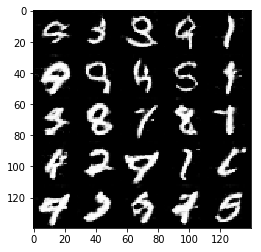

Epoch 2/2... Discriminator Loss: 0.2718... Generator Loss: 1.7628
Epoch 2/2... Discriminator Loss: 1.2568... Generator Loss: 0.6581
Epoch 2/2... Discriminator Loss: 1.4686... Generator Loss: 6.6781
Epoch 2/2... Discriminator Loss: 1.5177... Generator Loss: 4.4928
Epoch 2/2... Discriminator Loss: 2.6613... Generator Loss: 0.3702
Epoch 2/2... Discriminator Loss: 0.1322... Generator Loss: 2.8515
Epoch 2/2... Discriminator Loss: 0.2834... Generator Loss: 4.0911
Epoch 2/2... Discriminator Loss: 0.5154... Generator Loss: 1.2328
Epoch 2/2... Discriminator Loss: 2.0637... Generator Loss: 0.2256
Epoch 2/2... Discriminator Loss: 1.4625... Generator Loss: 0.4435


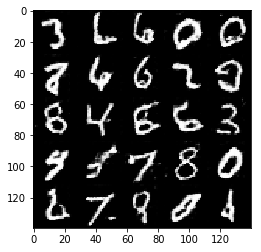

Epoch 2/2... Discriminator Loss: 0.0631... Generator Loss: 4.7662
Epoch 2/2... Discriminator Loss: 0.6899... Generator Loss: 1.8041
Epoch 2/2... Discriminator Loss: 1.6999... Generator Loss: 0.4427
Epoch 2/2... Discriminator Loss: 1.2497... Generator Loss: 0.6347
Epoch 2/2... Discriminator Loss: 0.6052... Generator Loss: 1.0906
Epoch 2/2... Discriminator Loss: 1.3434... Generator Loss: 0.9969
Epoch 2/2... Discriminator Loss: 0.6482... Generator Loss: 1.1040
Epoch 2/2... Discriminator Loss: 1.9124... Generator Loss: 0.2090
Epoch 2/2... Discriminator Loss: 0.3257... Generator Loss: 1.9126
Epoch 2/2... Discriminator Loss: 0.8106... Generator Loss: 1.4720


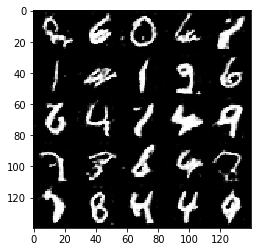

Epoch 2/2... Discriminator Loss: 0.8127... Generator Loss: 1.0247
Epoch 2/2... Discriminator Loss: 0.3811... Generator Loss: 3.4168
Epoch 2/2... Discriminator Loss: 1.1440... Generator Loss: 1.2478
Epoch 2/2... Discriminator Loss: 2.3321... Generator Loss: 0.1892
Epoch 2/2... Discriminator Loss: 0.0606... Generator Loss: 3.7548
Epoch 2/2... Discriminator Loss: 0.3767... Generator Loss: 2.1627
Epoch 2/2... Discriminator Loss: 0.2687... Generator Loss: 3.0178
Epoch 2/2... Discriminator Loss: 0.1915... Generator Loss: 3.4812
Epoch 2/2... Discriminator Loss: 0.6781... Generator Loss: 1.6812
Epoch 2/2... Discriminator Loss: 0.8977... Generator Loss: 1.4066


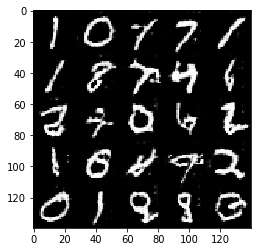

Epoch 2/2... Discriminator Loss: 0.7643... Generator Loss: 1.0608
Epoch 2/2... Discriminator Loss: 0.3715... Generator Loss: 1.2577
Epoch 2/2... Discriminator Loss: 0.6657... Generator Loss: 1.1437
Epoch 2/2... Discriminator Loss: 0.2601... Generator Loss: 3.6241
Epoch 2/2... Discriminator Loss: 0.4380... Generator Loss: 2.6572
Epoch 2/2... Discriminator Loss: 0.0448... Generator Loss: 5.6713
Epoch 2/2... Discriminator Loss: 0.1986... Generator Loss: 3.1686
Epoch 2/2... Discriminator Loss: 1.4306... Generator Loss: 0.4839
Epoch 2/2... Discriminator Loss: 0.3265... Generator Loss: 3.9300
Epoch 2/2... Discriminator Loss: 1.9852... Generator Loss: 0.7475


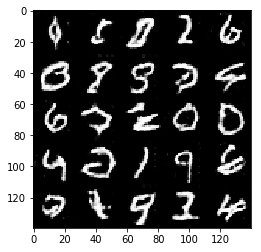

Epoch 2/2... Discriminator Loss: 1.7537... Generator Loss: 0.3716
Epoch 2/2... Discriminator Loss: 0.5337... Generator Loss: 1.5113
Epoch 2/2... Discriminator Loss: 1.7835... Generator Loss: 0.3326
Epoch 2/2... Discriminator Loss: 1.6809... Generator Loss: 0.3434
Epoch 2/2... Discriminator Loss: 0.1516... Generator Loss: 2.8567
Epoch 2/2... Discriminator Loss: 1.0124... Generator Loss: 0.9775
Epoch 2/2... Discriminator Loss: 0.9113... Generator Loss: 1.0577
Epoch 2/2... Discriminator Loss: 1.1852... Generator Loss: 0.9762
Epoch 2/2... Discriminator Loss: 0.8897... Generator Loss: 1.1424
Epoch 2/2... Discriminator Loss: 0.6310... Generator Loss: 1.1997


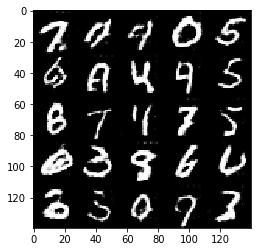

Epoch 2/2... Discriminator Loss: 0.4326... Generator Loss: 1.8434
Epoch 2/2... Discriminator Loss: 1.3566... Generator Loss: 0.7865
Epoch 2/2... Discriminator Loss: 0.1151... Generator Loss: 5.1117
Epoch 2/2... Discriminator Loss: 3.5700... Generator Loss: 0.1226
Epoch 2/2... Discriminator Loss: 0.9823... Generator Loss: 0.7000
Epoch 2/2... Discriminator Loss: 1.3252... Generator Loss: 0.7066
Epoch 2/2... Discriminator Loss: 2.0657... Generator Loss: 0.2858
Epoch 2/2... Discriminator Loss: 0.3996... Generator Loss: 2.1416
Epoch 2/2... Discriminator Loss: 0.4901... Generator Loss: 1.9372
Epoch 2/2... Discriminator Loss: 2.1736... Generator Loss: 0.2809


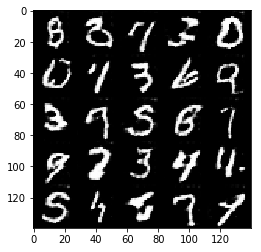

Epoch 2/2... Discriminator Loss: 0.4142... Generator Loss: 2.0207
Epoch 2/2... Discriminator Loss: 0.6522... Generator Loss: 1.4121
Epoch 2/2... Discriminator Loss: 0.3091... Generator Loss: 2.9719
Epoch 2/2... Discriminator Loss: 0.7656... Generator Loss: 2.1223
Epoch 2/2... Discriminator Loss: 1.1772... Generator Loss: 0.5663
Epoch 2/2... Discriminator Loss: 0.4464... Generator Loss: 1.5241
Epoch 2/2... Discriminator Loss: 0.4143... Generator Loss: 3.0404
Epoch 2/2... Discriminator Loss: 2.6779... Generator Loss: 0.1986
Epoch 2/2... Discriminator Loss: 0.5429... Generator Loss: 2.6063
Epoch 2/2... Discriminator Loss: 1.0702... Generator Loss: 0.8191


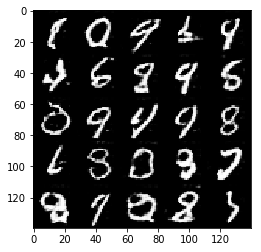

Epoch 2/2... Discriminator Loss: 1.0489... Generator Loss: 1.1009
Epoch 2/2... Discriminator Loss: 0.1077... Generator Loss: 4.5807
Epoch 2/2... Discriminator Loss: 0.3820... Generator Loss: 2.5646
Epoch 2/2... Discriminator Loss: 1.4493... Generator Loss: 0.8131
Epoch 2/2... Discriminator Loss: 0.8993... Generator Loss: 1.0264
Epoch 2/2... Discriminator Loss: 0.3709... Generator Loss: 2.1262
Epoch 2/2... Discriminator Loss: 1.5575... Generator Loss: 1.2400
Epoch 2/2... Discriminator Loss: 3.3640... Generator Loss: 0.1276
Epoch 2/2... Discriminator Loss: 0.7019... Generator Loss: 1.4712
Epoch 2/2... Discriminator Loss: 0.8385... Generator Loss: 1.0110


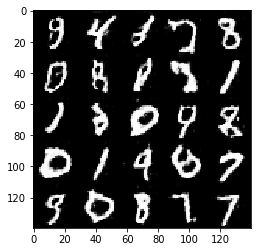

Epoch 2/2... Discriminator Loss: 3.7459... Generator Loss: 0.0484
Epoch 2/2... Discriminator Loss: 2.7859... Generator Loss: 0.1941
Epoch 2/2... Discriminator Loss: 0.0893... Generator Loss: 3.7062
Epoch 2/2... Discriminator Loss: 0.5571... Generator Loss: 1.6331
Epoch 2/2... Discriminator Loss: 0.2724... Generator Loss: 2.7543
Epoch 2/2... Discriminator Loss: 0.9592... Generator Loss: 0.9167
Epoch 2/2... Discriminator Loss: 1.3797... Generator Loss: 0.6488
Epoch 2/2... Discriminator Loss: 2.7411... Generator Loss: 0.4501
Epoch 2/2... Discriminator Loss: 1.1541... Generator Loss: 0.6303
Epoch 2/2... Discriminator Loss: 1.9608... Generator Loss: 0.4629


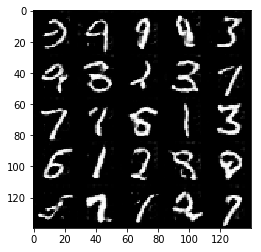

Epoch 2/2... Discriminator Loss: 0.0683... Generator Loss: 4.1513
Epoch 2/2... Discriminator Loss: 0.1612... Generator Loss: 2.3562
Epoch 2/2... Discriminator Loss: 1.0833... Generator Loss: 4.9183
Epoch 2/2... Discriminator Loss: 1.8754... Generator Loss: 6.2269
Epoch 2/2... Discriminator Loss: 1.5485... Generator Loss: 0.6437
Epoch 2/2... Discriminator Loss: 2.7734... Generator Loss: 0.3042
Epoch 2/2... Discriminator Loss: 1.3439... Generator Loss: 0.4489
Epoch 2/2... Discriminator Loss: 2.9459... Generator Loss: 0.2119
Epoch 2/2... Discriminator Loss: 0.3286... Generator Loss: 2.2839
Epoch 2/2... Discriminator Loss: 1.0048... Generator Loss: 1.1284


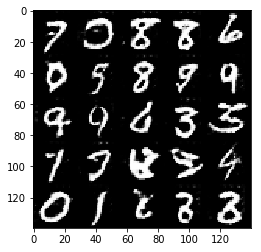

Epoch 2/2... Discriminator Loss: 1.2583... Generator Loss: 0.5927
Epoch 2/2... Discriminator Loss: 1.5428... Generator Loss: 0.5088
Epoch 2/2... Discriminator Loss: 1.0186... Generator Loss: 0.7698
Epoch 2/2... Discriminator Loss: 3.9373... Generator Loss: 0.0975
Epoch 2/2... Discriminator Loss: 2.3655... Generator Loss: 0.2160
Epoch 2/2... Discriminator Loss: 0.5182... Generator Loss: 2.1328
Epoch 2/2... Discriminator Loss: 0.5917... Generator Loss: 1.6536
Epoch 2/2... Discriminator Loss: 2.1011... Generator Loss: 0.2657
Epoch 2/2... Discriminator Loss: 0.1308... Generator Loss: 4.1493
Epoch 2/2... Discriminator Loss: 1.8610... Generator Loss: 0.4987


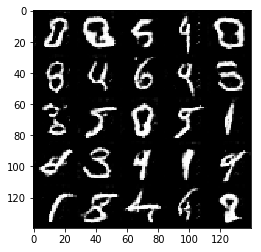

Epoch 2/2... Discriminator Loss: 0.8880... Generator Loss: 1.3103
Epoch 2/2... Discriminator Loss: 0.3279... Generator Loss: 3.0625
Epoch 2/2... Discriminator Loss: 0.5848... Generator Loss: 2.3985
Epoch 2/2... Discriminator Loss: 0.4620... Generator Loss: 1.7831
Epoch 2/2... Discriminator Loss: 0.9364... Generator Loss: 0.8086
Epoch 2/2... Discriminator Loss: 0.5413... Generator Loss: 2.9398
Epoch 2/2... Discriminator Loss: 2.1961... Generator Loss: 0.5442
Epoch 2/2... Discriminator Loss: 1.5777... Generator Loss: 0.3712
Epoch 2/2... Discriminator Loss: 0.6427... Generator Loss: 2.3113
Epoch 2/2... Discriminator Loss: 1.5253... Generator Loss: 0.6720


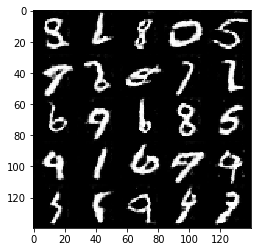

Epoch 2/2... Discriminator Loss: 0.4737... Generator Loss: 1.2969
Epoch 2/2... Discriminator Loss: 0.0638... Generator Loss: 4.0975
Epoch 2/2... Discriminator Loss: 0.6408... Generator Loss: 1.1483
Epoch 2/2... Discriminator Loss: 0.2335... Generator Loss: 2.1267
Epoch 2/2... Discriminator Loss: 0.8951... Generator Loss: 1.0715
Epoch 2/2... Discriminator Loss: 0.5649... Generator Loss: 2.7497
Epoch 2/2... Discriminator Loss: 2.7234... Generator Loss: 0.1070
Epoch 2/2... Discriminator Loss: 0.0556... Generator Loss: 5.1593
Epoch 2/2... Discriminator Loss: 0.3805... Generator Loss: 1.8092
Epoch 2/2... Discriminator Loss: 0.5289... Generator Loss: 1.5787


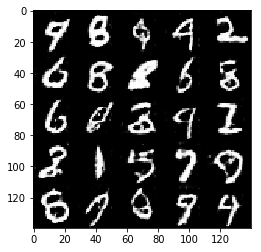

Epoch 2/2... Discriminator Loss: 2.0286... Generator Loss: 0.3358
Epoch 2/2... Discriminator Loss: 0.2800... Generator Loss: 3.3699
Epoch 2/2... Discriminator Loss: 0.6596... Generator Loss: 2.5634
Epoch 2/2... Discriminator Loss: 0.3189... Generator Loss: 2.0940
Epoch 2/2... Discriminator Loss: 0.7922... Generator Loss: 1.0752
Epoch 2/2... Discriminator Loss: 0.5647... Generator Loss: 3.9682
Epoch 2/2... Discriminator Loss: 0.4120... Generator Loss: 2.2750
Epoch 2/2... Discriminator Loss: 1.7965... Generator Loss: 0.4780
Epoch 2/2... Discriminator Loss: 3.1256... Generator Loss: 0.0771
Epoch 2/2... Discriminator Loss: 0.4385... Generator Loss: 2.6653


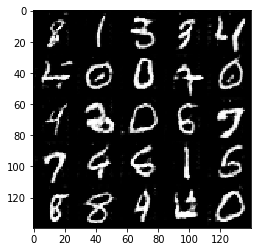

Epoch 2/2... Discriminator Loss: 0.8854... Generator Loss: 4.1182
Epoch 2/2... Discriminator Loss: 1.2977... Generator Loss: 3.6229
Epoch 2/2... Discriminator Loss: 0.4872... Generator Loss: 2.5226
Epoch 2/2... Discriminator Loss: 1.4612... Generator Loss: 0.7398
Epoch 2/2... Discriminator Loss: 0.9451... Generator Loss: 1.5395
Epoch 2/2... Discriminator Loss: 0.0718... Generator Loss: 3.0751
Epoch 2/2... Discriminator Loss: 1.5815... Generator Loss: 0.4753
Epoch 2/2... Discriminator Loss: 0.4597... Generator Loss: 2.0601
Epoch 2/2... Discriminator Loss: 1.2251... Generator Loss: 0.7236
Epoch 2/2... Discriminator Loss: 0.9226... Generator Loss: 1.3471


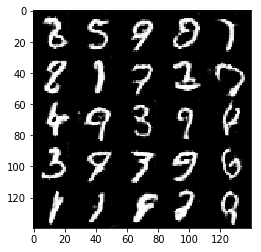

Epoch 2/2... Discriminator Loss: 0.1067... Generator Loss: 3.7534
Epoch 2/2... Discriminator Loss: 0.1893... Generator Loss: 2.7074
Epoch 2/2... Discriminator Loss: 0.3203... Generator Loss: 1.6773
Epoch 2/2... Discriminator Loss: 0.2099... Generator Loss: 3.2886
Epoch 2/2... Discriminator Loss: 0.9286... Generator Loss: 0.7355
Epoch 2/2... Discriminator Loss: 1.8919... Generator Loss: 0.4111
Epoch 2/2... Discriminator Loss: 1.1616... Generator Loss: 1.4965
Epoch 2/2... Discriminator Loss: 0.3641... Generator Loss: 2.0755
Epoch 2/2... Discriminator Loss: 0.3320... Generator Loss: 2.0283
Epoch 2/2... Discriminator Loss: 0.1382... Generator Loss: 2.8166


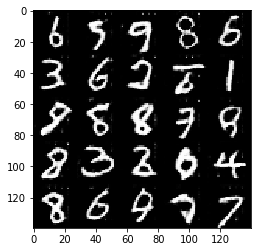

Epoch 2/2... Discriminator Loss: 0.4756... Generator Loss: 1.4563
Epoch 2/2... Discriminator Loss: 0.6653... Generator Loss: 0.9390
Epoch 2/2... Discriminator Loss: 1.3015... Generator Loss: 0.8555
Epoch 2/2... Discriminator Loss: 0.8961... Generator Loss: 0.8331
Epoch 2/2... Discriminator Loss: 0.2632... Generator Loss: 2.6013
Epoch 2/2... Discriminator Loss: 0.7079... Generator Loss: 0.7653
Epoch 2/2... Discriminator Loss: 1.4629... Generator Loss: 0.5941
Epoch 2/2... Discriminator Loss: 0.7074... Generator Loss: 0.7711
Epoch 2/2... Discriminator Loss: 0.9415... Generator Loss: 0.8547
Epoch 2/2... Discriminator Loss: 0.6967... Generator Loss: 1.1807


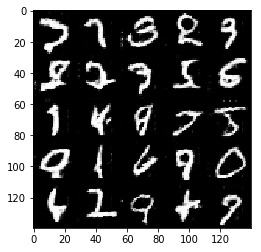

Epoch 2/2... Discriminator Loss: 0.1788... Generator Loss: 2.4851
Epoch 2/2... Discriminator Loss: 0.1466... Generator Loss: 3.2687
Epoch 2/2... Discriminator Loss: 2.4399... Generator Loss: 0.1446
Epoch 2/2... Discriminator Loss: 0.0248... Generator Loss: 4.7266
Epoch 2/2... Discriminator Loss: 0.8513... Generator Loss: 3.3041
Epoch 2/2... Discriminator Loss: 0.3937... Generator Loss: 1.8587
Epoch 2/2... Discriminator Loss: 0.2300... Generator Loss: 1.9767
Epoch 2/2... Discriminator Loss: 2.1931... Generator Loss: 0.2638
Epoch 2/2... Discriminator Loss: 0.8531... Generator Loss: 0.9379
Epoch 2/2... Discriminator Loss: 1.8849... Generator Loss: 0.5299


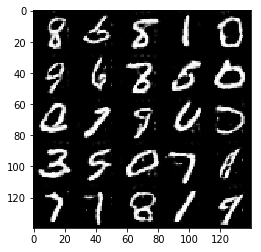

Epoch 2/2... Discriminator Loss: 0.8293... Generator Loss: 1.2626
Epoch 2/2... Discriminator Loss: 0.5972... Generator Loss: 1.1992
Epoch 2/2... Discriminator Loss: 0.5918... Generator Loss: 1.8063
Epoch 2/2... Discriminator Loss: 0.9404... Generator Loss: 1.0627
Epoch 2/2... Discriminator Loss: 0.1679... Generator Loss: 2.9696
Epoch 2/2... Discriminator Loss: 1.0146... Generator Loss: 1.0256
Epoch 2/2... Discriminator Loss: 0.3143... Generator Loss: 1.7621
Epoch 2/2... Discriminator Loss: 2.0238... Generator Loss: 0.3034
Epoch 2/2... Discriminator Loss: 0.7928... Generator Loss: 1.2118
Epoch 2/2... Discriminator Loss: 0.1699... Generator Loss: 3.1255


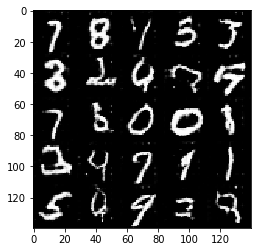

Epoch 2/2... Discriminator Loss: 1.9963... Generator Loss: 0.7113
Epoch 2/2... Discriminator Loss: 0.6755... Generator Loss: 1.8884
Epoch 2/2... Discriminator Loss: 0.4797... Generator Loss: 6.4523
Epoch 2/2... Discriminator Loss: 0.6649... Generator Loss: 1.0125
Epoch 2/2... Discriminator Loss: 2.3271... Generator Loss: 0.3445
Epoch 2/2... Discriminator Loss: 0.3184... Generator Loss: 2.2476
Epoch 2/2... Discriminator Loss: 0.1178... Generator Loss: 3.5897
Epoch 2/2... Discriminator Loss: 0.1358... Generator Loss: 2.9089
Epoch 2/2... Discriminator Loss: 0.5625... Generator Loss: 1.4483
Epoch 2/2... Discriminator Loss: 0.7046... Generator Loss: 0.8957


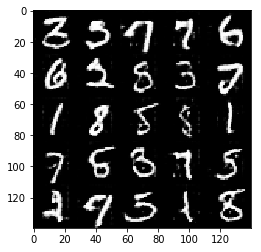

Epoch 2/2... Discriminator Loss: 0.1948... Generator Loss: 3.3015
Epoch 2/2... Discriminator Loss: 0.4476... Generator Loss: 2.7157
Epoch 2/2... Discriminator Loss: 0.9856... Generator Loss: 0.7404
Epoch 2/2... Discriminator Loss: 0.3736... Generator Loss: 1.9934
Epoch 2/2... Discriminator Loss: 0.3862... Generator Loss: 1.7124
Epoch 2/2... Discriminator Loss: 0.6339... Generator Loss: 1.1667
Epoch 2/2... Discriminator Loss: 1.5162... Generator Loss: 0.3273
Epoch 2/2... Discriminator Loss: 0.7047... Generator Loss: 0.7904
Epoch 2/2... Discriminator Loss: 0.2051... Generator Loss: 2.6900
Epoch 2/2... Discriminator Loss: 2.8666... Generator Loss: 0.1464


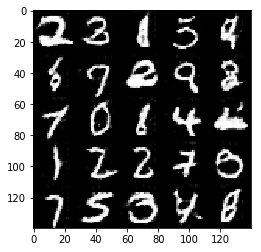

Epoch 2/2... Discriminator Loss: 1.5235... Generator Loss: 1.0516
Epoch 2/2... Discriminator Loss: 0.9874... Generator Loss: 1.1199
Epoch 2/2... Discriminator Loss: 2.5425... Generator Loss: 0.2910
Epoch 2/2... Discriminator Loss: 1.3036... Generator Loss: 0.9525
Epoch 2/2... Discriminator Loss: 0.5996... Generator Loss: 2.1971
Epoch 2/2... Discriminator Loss: 3.0830... Generator Loss: 0.0704
Epoch 2/2... Discriminator Loss: 1.3530... Generator Loss: 4.9537
Epoch 2/2... Discriminator Loss: 0.3477... Generator Loss: 2.3338
Epoch 2/2... Discriminator Loss: 0.2866... Generator Loss: 2.6732
Epoch 2/2... Discriminator Loss: 2.4710... Generator Loss: 0.3465


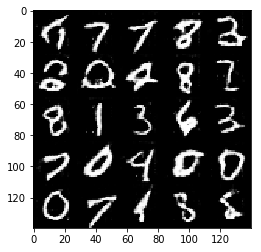

Epoch 2/2... Discriminator Loss: 0.1860... Generator Loss: 3.6156
Epoch 2/2... Discriminator Loss: 0.5362... Generator Loss: 2.4252
Epoch 2/2... Discriminator Loss: 0.4852... Generator Loss: 2.3864
Epoch 2/2... Discriminator Loss: 1.6305... Generator Loss: 0.4990
Epoch 2/2... Discriminator Loss: 2.2818... Generator Loss: 0.4841
Epoch 2/2... Discriminator Loss: 0.1669... Generator Loss: 3.5250
Epoch 2/2... Discriminator Loss: 1.3274... Generator Loss: 0.6376
Epoch 2/2... Discriminator Loss: 0.6041... Generator Loss: 1.6738
Epoch 2/2... Discriminator Loss: 1.5830... Generator Loss: 0.6320
Epoch 2/2... Discriminator Loss: 0.5483... Generator Loss: 2.0712


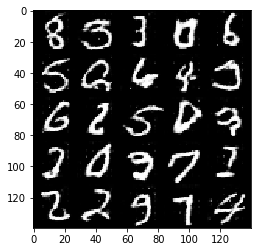

Epoch 2/2... Discriminator Loss: 0.4247... Generator Loss: 2.4283
Epoch 2/2... Discriminator Loss: 2.2596... Generator Loss: 0.1969
Epoch 2/2... Discriminator Loss: 2.0671... Generator Loss: 1.3399
Epoch 2/2... Discriminator Loss: 0.3828... Generator Loss: 1.7359
Epoch 2/2... Discriminator Loss: 0.0666... Generator Loss: 3.7974
Epoch 2/2... Discriminator Loss: 0.0803... Generator Loss: 3.4214
Epoch 2/2... Discriminator Loss: 1.6615... Generator Loss: 0.2943
Epoch 2/2... Discriminator Loss: 0.6353... Generator Loss: 1.6666
Epoch 2/2... Discriminator Loss: 0.1472... Generator Loss: 6.0003
Epoch 2/2... Discriminator Loss: 0.0958... Generator Loss: 4.1489


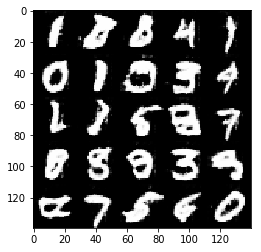

Epoch 2/2... Discriminator Loss: 0.1976... Generator Loss: 2.2298
Epoch 2/2... Discriminator Loss: 0.1875... Generator Loss: 2.5120
Epoch 2/2... Discriminator Loss: 0.3792... Generator Loss: 2.5075
Epoch 2/2... Discriminator Loss: 0.0541... Generator Loss: 3.9455
Epoch 2/2... Discriminator Loss: 1.5458... Generator Loss: 1.1920
Epoch 2/2... Discriminator Loss: 3.3125... Generator Loss: 0.1214
Epoch 2/2... Discriminator Loss: 2.1866... Generator Loss: 0.5218
Epoch 2/2... Discriminator Loss: 0.4672... Generator Loss: 1.6423
Epoch 2/2... Discriminator Loss: 0.8275... Generator Loss: 0.8873
Epoch 2/2... Discriminator Loss: 0.7491... Generator Loss: 1.2395


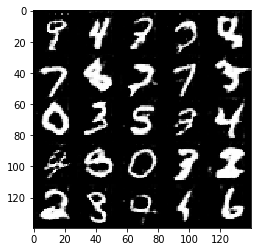

Epoch 2/2... Discriminator Loss: 1.3139... Generator Loss: 0.5946
Epoch 2/2... Discriminator Loss: 0.3165... Generator Loss: 2.4115
Epoch 2/2... Discriminator Loss: 3.2918... Generator Loss: 0.0592
Epoch 2/2... Discriminator Loss: 2.0000... Generator Loss: 0.3628
Epoch 2/2... Discriminator Loss: 2.1641... Generator Loss: 0.3283
Epoch 2/2... Discriminator Loss: 0.1693... Generator Loss: 7.2323
Epoch 2/2... Discriminator Loss: 2.7788... Generator Loss: 0.3191
Epoch 2/2... Discriminator Loss: 0.4425... Generator Loss: 1.6133
Epoch 2/2... Discriminator Loss: 0.5012... Generator Loss: 1.6953
Epoch 2/2... Discriminator Loss: 2.2217... Generator Loss: 0.3437


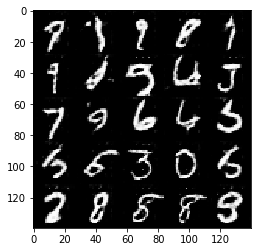

Epoch 2/2... Discriminator Loss: 1.0362... Generator Loss: 1.1846
Epoch 2/2... Discriminator Loss: 0.9523... Generator Loss: 0.9721
Epoch 2/2... Discriminator Loss: 0.7817... Generator Loss: 0.9734
Epoch 2/2... Discriminator Loss: 1.4488... Generator Loss: 0.3322
Epoch 2/2... Discriminator Loss: 0.3575... Generator Loss: 2.4147
Epoch 2/2... Discriminator Loss: 0.8410... Generator Loss: 1.2281
Epoch 2/2... Discriminator Loss: 0.5765... Generator Loss: 1.7368
Epoch 2/2... Discriminator Loss: 0.6439... Generator Loss: 1.1866
Epoch 2/2... Discriminator Loss: 0.2791... Generator Loss: 3.0701
Epoch 2/2... Discriminator Loss: 1.6497... Generator Loss: 0.8599


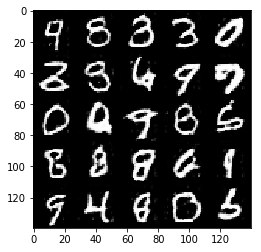

Epoch 2/2... Discriminator Loss: 0.8727... Generator Loss: 1.2620
Epoch 2/2... Discriminator Loss: 0.0701... Generator Loss: 3.3519
Epoch 2/2... Discriminator Loss: 1.3304... Generator Loss: 4.3090
Epoch 2/2... Discriminator Loss: 4.6444... Generator Loss: 0.0378
Epoch 2/2... Discriminator Loss: 1.1170... Generator Loss: 0.9367
Epoch 2/2... Discriminator Loss: 1.0465... Generator Loss: 0.9462
Epoch 2/2... Discriminator Loss: 0.1051... Generator Loss: 5.9448
Epoch 2/2... Discriminator Loss: 0.7271... Generator Loss: 1.1241
Epoch 2/2... Discriminator Loss: 0.9978... Generator Loss: 1.0684
Epoch 2/2... Discriminator Loss: 0.4112... Generator Loss: 1.5615


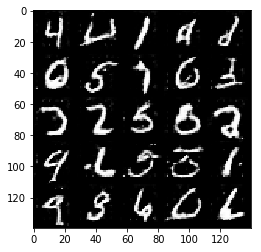

Epoch 2/2... Discriminator Loss: 2.0367... Generator Loss: 0.7644
Epoch 2/2... Discriminator Loss: 0.7514... Generator Loss: 1.9262
Epoch 2/2... Discriminator Loss: 1.5750... Generator Loss: 0.3279
Epoch 2/2... Discriminator Loss: 0.2106... Generator Loss: 2.8020
Epoch 2/2... Discriminator Loss: 3.1882... Generator Loss: 0.1218
Epoch 2/2... Discriminator Loss: 0.4218... Generator Loss: 1.5357
Epoch 2/2... Discriminator Loss: 0.8087... Generator Loss: 1.0636
Epoch 2/2... Discriminator Loss: 0.5380... Generator Loss: 1.5877
Epoch 2/2... Discriminator Loss: 0.5071... Generator Loss: 1.7828
Epoch 2/2... Discriminator Loss: 0.3214... Generator Loss: 2.0513


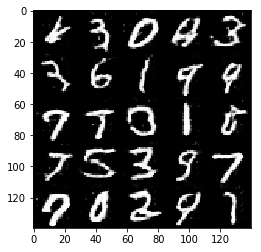

In [23]:
batch_size = 10
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.0922... Generator Loss: 7.7848
Epoch 1/1... Discriminator Loss: 1.8124... Generator Loss: 2.5172
Epoch 1/1... Discriminator Loss: 1.0380... Generator Loss: 16.4053
Epoch 1/1... Discriminator Loss: 1.2183... Generator Loss: 1.9191
Epoch 1/1... Discriminator Loss: 6.9591... Generator Loss: 17.2301
Epoch 1/1... Discriminator Loss: 0.2903... Generator Loss: 3.9457
Epoch 1/1... Discriminator Loss: 3.1014... Generator Loss: 8.4937
Epoch 1/1... Discriminator Loss: 0.8073... Generator Loss: 0.9766
Epoch 1/1... Discriminator Loss: 1.4430... Generator Loss: 0.4035
Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 6.2951


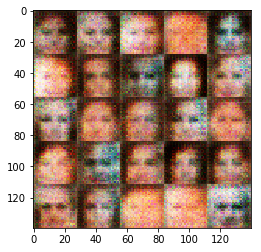

Epoch 1/1... Discriminator Loss: 1.5249... Generator Loss: 0.3574
Epoch 1/1... Discriminator Loss: 1.2734... Generator Loss: 3.8772
Epoch 1/1... Discriminator Loss: 1.2505... Generator Loss: 3.9059
Epoch 1/1... Discriminator Loss: 1.7767... Generator Loss: 0.3365
Epoch 1/1... Discriminator Loss: 0.7460... Generator Loss: 1.1462
Epoch 1/1... Discriminator Loss: 0.7354... Generator Loss: 1.5571
Epoch 1/1... Discriminator Loss: 0.5392... Generator Loss: 1.7694
Epoch 1/1... Discriminator Loss: 1.8819... Generator Loss: 4.6156
Epoch 1/1... Discriminator Loss: 1.1311... Generator Loss: 2.9660
Epoch 1/1... Discriminator Loss: 0.8459... Generator Loss: 1.3210


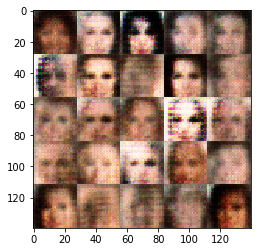

Epoch 1/1... Discriminator Loss: 0.9259... Generator Loss: 1.2821
Epoch 1/1... Discriminator Loss: 0.9419... Generator Loss: 2.1421
Epoch 1/1... Discriminator Loss: 3.2328... Generator Loss: 0.0700
Epoch 1/1... Discriminator Loss: 1.0900... Generator Loss: 0.8216
Epoch 1/1... Discriminator Loss: 0.9065... Generator Loss: 1.0850
Epoch 1/1... Discriminator Loss: 1.0882... Generator Loss: 2.4077
Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 0.4810
Epoch 1/1... Discriminator Loss: 1.2392... Generator Loss: 0.6228
Epoch 1/1... Discriminator Loss: 1.1537... Generator Loss: 0.6499
Epoch 1/1... Discriminator Loss: 0.8082... Generator Loss: 0.9662


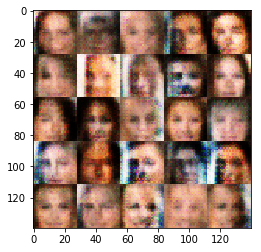

Epoch 1/1... Discriminator Loss: 1.1303... Generator Loss: 0.7137
Epoch 1/1... Discriminator Loss: 1.4775... Generator Loss: 2.2325
Epoch 1/1... Discriminator Loss: 1.6460... Generator Loss: 2.9293
Epoch 1/1... Discriminator Loss: 1.4610... Generator Loss: 2.0666
Epoch 1/1... Discriminator Loss: 1.0425... Generator Loss: 0.9514
Epoch 1/1... Discriminator Loss: 1.0013... Generator Loss: 0.7941
Epoch 1/1... Discriminator Loss: 0.8200... Generator Loss: 1.3038
Epoch 1/1... Discriminator Loss: 0.9359... Generator Loss: 0.8160
Epoch 1/1... Discriminator Loss: 1.0974... Generator Loss: 1.5644
Epoch 1/1... Discriminator Loss: 1.5704... Generator Loss: 0.3956


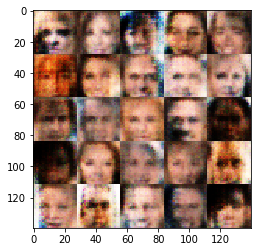

Epoch 1/1... Discriminator Loss: 1.1880... Generator Loss: 1.6517
Epoch 1/1... Discriminator Loss: 1.0047... Generator Loss: 1.6137
Epoch 1/1... Discriminator Loss: 1.2201... Generator Loss: 1.5172
Epoch 1/1... Discriminator Loss: 0.8859... Generator Loss: 1.5347
Epoch 1/1... Discriminator Loss: 1.0260... Generator Loss: 1.0794
Epoch 1/1... Discriminator Loss: 0.8460... Generator Loss: 1.3244
Epoch 1/1... Discriminator Loss: 1.0985... Generator Loss: 0.7505
Epoch 1/1... Discriminator Loss: 1.0453... Generator Loss: 1.5036
Epoch 1/1... Discriminator Loss: 0.8018... Generator Loss: 1.2922
Epoch 1/1... Discriminator Loss: 0.9249... Generator Loss: 1.4945


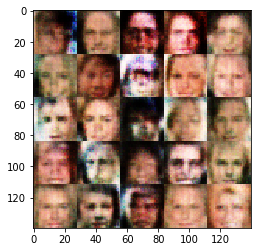

Epoch 1/1... Discriminator Loss: 1.0990... Generator Loss: 1.0893
Epoch 1/1... Discriminator Loss: 0.9584... Generator Loss: 1.6012
Epoch 1/1... Discriminator Loss: 2.8754... Generator Loss: 0.0817
Epoch 1/1... Discriminator Loss: 1.2008... Generator Loss: 0.7954
Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 1.6759
Epoch 1/1... Discriminator Loss: 0.9505... Generator Loss: 0.8526
Epoch 1/1... Discriminator Loss: 1.0304... Generator Loss: 1.2366
Epoch 1/1... Discriminator Loss: 1.0593... Generator Loss: 0.9715
Epoch 1/1... Discriminator Loss: 1.1745... Generator Loss: 0.7103
Epoch 1/1... Discriminator Loss: 1.5077... Generator Loss: 0.3858


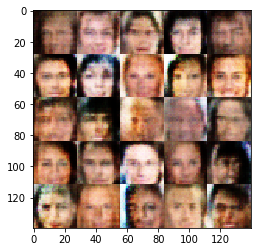

Epoch 1/1... Discriminator Loss: 0.9928... Generator Loss: 1.1255
Epoch 1/1... Discriminator Loss: 1.0755... Generator Loss: 2.5489
Epoch 1/1... Discriminator Loss: 1.2019... Generator Loss: 2.8510
Epoch 1/1... Discriminator Loss: 2.6820... Generator Loss: 3.0196
Epoch 1/1... Discriminator Loss: 0.6062... Generator Loss: 1.0921
Epoch 1/1... Discriminator Loss: 0.5121... Generator Loss: 1.5582
Epoch 1/1... Discriminator Loss: 1.2751... Generator Loss: 0.6399
Epoch 1/1... Discriminator Loss: 0.4378... Generator Loss: 2.5071
Epoch 1/1... Discriminator Loss: 0.4730... Generator Loss: 1.7190
Epoch 1/1... Discriminator Loss: 4.0698... Generator Loss: 6.8687


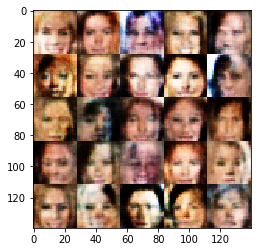

Epoch 1/1... Discriminator Loss: 1.8700... Generator Loss: 6.0835
Epoch 1/1... Discriminator Loss: 0.5972... Generator Loss: 1.3967
Epoch 1/1... Discriminator Loss: 2.0312... Generator Loss: 3.5367
Epoch 1/1... Discriminator Loss: 0.1433... Generator Loss: 3.3461
Epoch 1/1... Discriminator Loss: 0.2922... Generator Loss: 1.8093
Epoch 1/1... Discriminator Loss: 0.3599... Generator Loss: 3.5103
Epoch 1/1... Discriminator Loss: 1.0712... Generator Loss: 0.6482
Epoch 1/1... Discriminator Loss: 0.8675... Generator Loss: 0.9014
Epoch 1/1... Discriminator Loss: 0.6361... Generator Loss: 2.7509
Epoch 1/1... Discriminator Loss: 0.2421... Generator Loss: 3.5418


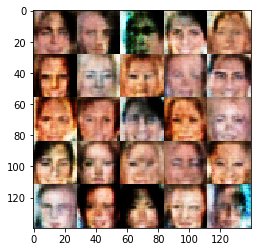

Epoch 1/1... Discriminator Loss: 0.4521... Generator Loss: 1.2598
Epoch 1/1... Discriminator Loss: 3.6534... Generator Loss: 5.6261
Epoch 1/1... Discriminator Loss: 0.4234... Generator Loss: 1.6822
Epoch 1/1... Discriminator Loss: 0.4863... Generator Loss: 2.6007
Epoch 1/1... Discriminator Loss: 0.1307... Generator Loss: 3.9809
Epoch 1/1... Discriminator Loss: 0.2920... Generator Loss: 1.8329
Epoch 1/1... Discriminator Loss: 0.4898... Generator Loss: 4.3931
Epoch 1/1... Discriminator Loss: 0.0596... Generator Loss: 4.3662
Epoch 1/1... Discriminator Loss: 1.5242... Generator Loss: 0.5032
Epoch 1/1... Discriminator Loss: 0.8180... Generator Loss: 0.7726


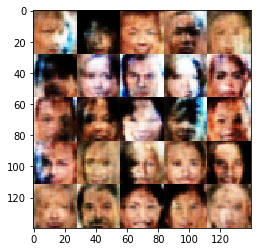

Epoch 1/1... Discriminator Loss: 1.4745... Generator Loss: 3.8053
Epoch 1/1... Discriminator Loss: 0.2868... Generator Loss: 3.9884
Epoch 1/1... Discriminator Loss: 0.0660... Generator Loss: 3.6014
Epoch 1/1... Discriminator Loss: 0.2017... Generator Loss: 3.1247
Epoch 1/1... Discriminator Loss: 0.3325... Generator Loss: 6.0472
Epoch 1/1... Discriminator Loss: 0.8044... Generator Loss: 0.8446
Epoch 1/1... Discriminator Loss: 0.6391... Generator Loss: 0.9948
Epoch 1/1... Discriminator Loss: 0.0666... Generator Loss: 3.8054
Epoch 1/1... Discriminator Loss: 2.5409... Generator Loss: 0.1281
Epoch 1/1... Discriminator Loss: 0.2522... Generator Loss: 3.4456


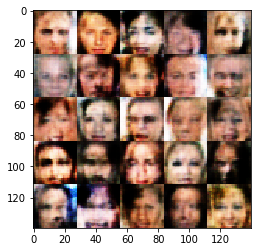

Epoch 1/1... Discriminator Loss: 1.8921... Generator Loss: 0.3613
Epoch 1/1... Discriminator Loss: 1.1617... Generator Loss: 2.1689
Epoch 1/1... Discriminator Loss: 0.8747... Generator Loss: 0.9286
Epoch 1/1... Discriminator Loss: 0.6306... Generator Loss: 2.1932
Epoch 1/1... Discriminator Loss: 0.4972... Generator Loss: 1.3046
Epoch 1/1... Discriminator Loss: 1.2820... Generator Loss: 3.4315
Epoch 1/1... Discriminator Loss: 1.0529... Generator Loss: 3.3784
Epoch 1/1... Discriminator Loss: 1.0881... Generator Loss: 5.1822
Epoch 1/1... Discriminator Loss: 0.1430... Generator Loss: 4.2236
Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 0.6896


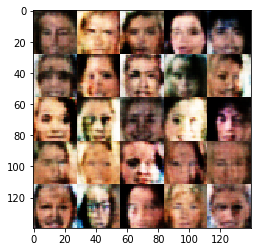

Epoch 1/1... Discriminator Loss: 0.7789... Generator Loss: 1.7688
Epoch 1/1... Discriminator Loss: 0.7081... Generator Loss: 3.1644
Epoch 1/1... Discriminator Loss: 1.3128... Generator Loss: 0.5316
Epoch 1/1... Discriminator Loss: 2.5666... Generator Loss: 0.1529
Epoch 1/1... Discriminator Loss: 0.6805... Generator Loss: 5.0303
Epoch 1/1... Discriminator Loss: 0.2278... Generator Loss: 1.9878
Epoch 1/1... Discriminator Loss: 0.9915... Generator Loss: 0.7186
Epoch 1/1... Discriminator Loss: 0.9525... Generator Loss: 1.2120
Epoch 1/1... Discriminator Loss: 0.8283... Generator Loss: 0.9930
Epoch 1/1... Discriminator Loss: 0.4982... Generator Loss: 1.4449


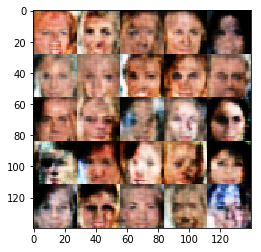

Epoch 1/1... Discriminator Loss: 0.6726... Generator Loss: 1.8858
Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 3.2798
Epoch 1/1... Discriminator Loss: 0.2042... Generator Loss: 4.0316
Epoch 1/1... Discriminator Loss: 0.1420... Generator Loss: 4.0188
Epoch 1/1... Discriminator Loss: 0.2537... Generator Loss: 1.9438
Epoch 1/1... Discriminator Loss: 0.9201... Generator Loss: 0.7006
Epoch 1/1... Discriminator Loss: 0.5978... Generator Loss: 4.8978
Epoch 1/1... Discriminator Loss: 0.8872... Generator Loss: 0.7308
Epoch 1/1... Discriminator Loss: 0.4829... Generator Loss: 4.4866
Epoch 1/1... Discriminator Loss: 0.4219... Generator Loss: 5.7193


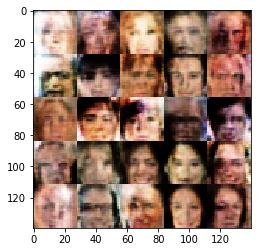

Epoch 1/1... Discriminator Loss: 0.2869... Generator Loss: 3.8136
Epoch 1/1... Discriminator Loss: 2.8036... Generator Loss: 6.9043
Epoch 1/1... Discriminator Loss: 0.9273... Generator Loss: 0.9771
Epoch 1/1... Discriminator Loss: 0.1463... Generator Loss: 3.1454
Epoch 1/1... Discriminator Loss: 0.7916... Generator Loss: 0.8154
Epoch 1/1... Discriminator Loss: 1.4452... Generator Loss: 0.4505
Epoch 1/1... Discriminator Loss: 0.3422... Generator Loss: 1.9530
Epoch 1/1... Discriminator Loss: 0.5296... Generator Loss: 3.9938
Epoch 1/1... Discriminator Loss: 2.3785... Generator Loss: 4.5571
Epoch 1/1... Discriminator Loss: 0.2203... Generator Loss: 2.4352


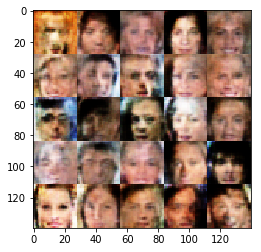

Epoch 1/1... Discriminator Loss: 1.1097... Generator Loss: 0.5635
Epoch 1/1... Discriminator Loss: 0.2757... Generator Loss: 2.2848
Epoch 1/1... Discriminator Loss: 2.0334... Generator Loss: 5.8124
Epoch 1/1... Discriminator Loss: 1.0685... Generator Loss: 0.6669
Epoch 1/1... Discriminator Loss: 0.3617... Generator Loss: 1.7817
Epoch 1/1... Discriminator Loss: 0.1283... Generator Loss: 4.0820
Epoch 1/1... Discriminator Loss: 0.1208... Generator Loss: 3.4052
Epoch 1/1... Discriminator Loss: 0.1433... Generator Loss: 2.8202
Epoch 1/1... Discriminator Loss: 1.2617... Generator Loss: 0.8129
Epoch 1/1... Discriminator Loss: 0.6911... Generator Loss: 1.6463


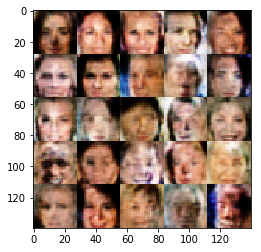

Epoch 1/1... Discriminator Loss: 0.8053... Generator Loss: 1.9369
Epoch 1/1... Discriminator Loss: 2.1162... Generator Loss: 0.5567
Epoch 1/1... Discriminator Loss: 0.8000... Generator Loss: 1.2393
Epoch 1/1... Discriminator Loss: 1.0831... Generator Loss: 3.0613
Epoch 1/1... Discriminator Loss: 0.8787... Generator Loss: 0.8618
Epoch 1/1... Discriminator Loss: 1.0019... Generator Loss: 1.1958
Epoch 1/1... Discriminator Loss: 0.7462... Generator Loss: 1.3859
Epoch 1/1... Discriminator Loss: 0.6950... Generator Loss: 1.4084


In [25]:
batch_size = 128
z_dim = 96
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.